# Projet 3 Openclassrooms 
## Notebook n°2 Exploration des données

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib.ticker import AutoMinorLocator
from matplotlib.collections import LineCollection

from datetime import datetime
import time

from sklearn.model_selection import train_test_split
from sklearn import neighbors

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', None)


In [2]:
#Chargement du dataset nettoyé
df_clean = pd.read_pickle("dataset_clean.pkl")
df_clean.head()

,code,created_datetime,product_name,pnns_groups_1,quantity,brands,label_bio,stores,countries_fr,ingredients_text,allergens,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,additives_n,sugars_100g,salt_100g,ingredients_from_palm_oil_n,fiber_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr
106,36252.0,2015-01-25 21:35:01+00:00,Lion Peanut x2,Sugary snacks,NaN,Sunridge,Non bio,NaN,"France,États-Unis","Milk chocolate coating (evaporated cane juice, cocoa butter, unsweetened chocolate, whole milk powder, soy lecithin, natural vanilla), dried cranberries (cranberries, sugar, sunflower oil), pure food glaze",NaN,1883.0,20.0,12.5,70.0,2.5,1.0,57.5,0.09652,0.0,2.5,NaN,e
182,5200016.0,2015-09-02 09:37:37+00:00,lentilles vertes,Cereals and potatoes,1 kg,Bertrand Lejeune,Bio,NaN,France,lentilles vertes,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
184,7730009.0,2016-05-09 15:07:12+00:00,Biscuits sablés fourrage au cacao,Sugary snacks,1 kg,St Michel,Non bio,NaN,France,"Sucre, farine de _Blé_, graisse et huiles végétales (karité, colza et tournesol), cacao maigre en poudre 7%, sirop de glucose, dextrine, _Beurre_ concentré, _Oeufs_, pâte de _Noisette_, pâte de cacao, émulsifiants : lécithines (colza et tournesol), sel, poudre à lever : carbonates d'ammonium, arômes.","Blé, Beurre, Oeufs, Noisette",NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,0.0,NaN,NaN,NaN
188,10090206.0,2013-06-11 19:03:51+00:00,Thé de Noël aromatisé orange-cannelle,Beverages,75 g,Alice Délice,Non bio,Alice Délice,France,"Thé noir de Chine, zestes d'oranges 7,5 %, arômes naturels (cannelle 4,7 %, orange 4,7 %, poudre de cannelle 3,9 %).",NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
189,10127735.0,2016-05-07 10:25:04+00:00,Sirops pour ganache macarons,Sugary snacks,4 x 5 cl,Alice Délice,Non bio,Alice Délice,France,"Sirop saveur pistache 5 cl : sirop 99,16 % (sucre cristallisé, eau), arôme, acidifiant : acide citrique E330, denrée alimentaire colorante (concentrés de carthame, pomme), colorant : mélange d'additifs : E171, E211, E131. Sirop saveur framboise 5 cl : sirop 93,98 % (sucre, eau), denrée alimentaire colorante (concentrés de patate douce, cerise, pomme, radis, carthame), arôme naturel, acidifiant : acide citrique E330, colorant : mélange d'additifs : E171, E211. Sirop saveur citron 5 cl : sirop 98,86 % (sucre cristallisé, eau), arôme naturel, acidifiant : acide citrique E330, denrée alimentaire colorante (concentré de pomme, carthame), colorant : mélange d'additifs : E171, E211. Sirop saveur violette 4 cl : sirop 88,40 % (sucre, eau), arôme, acidifiant : acide citrique E330, denrée alimentaire colorante (concentré de cassis, carotte, pomme), colorant : mélange d'additifs : E131, E211, E171.",NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0.0,NaN,NaN,NaN


# 1 Analyse des données : ANOVA
# 1.1 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et l'énergie (energy_100g)

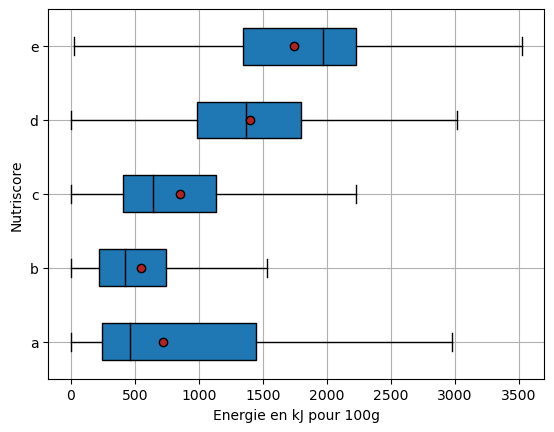

In [3]:
X = "nutrition_grade_fr" # qualitative
Y = "energy_100g" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) &(df_clean['energy_100g'].isnull() == False)].copy()



#Boxplots :
modalites = sous_echantillon[X].sort_values().unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Energie en kJ pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()




In [4]:
#Observation des produits avec nutriscore "a" et Energie supérieure à 2500kJ : 
sous_echantillon.loc[(sous_echantillon['nutrition_grade_fr'] == 'a') & (sous_echantillon['energy_100g'] > 2500)]

,code,created_datetime,product_name,pnns_groups_1,quantity,brands,label_bio,stores,countries_fr,ingredients_text,allergens,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,additives_n,sugars_100g,salt_100g,ingredients_from_palm_oil_n,fiber_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr
177017,2.000573e+07,2014-06-03 23:30:12+00:00,Walnuts,Salty snacks,200 g,"Alesto,Alesto Fine",Non bio,LIDL,France,_Noix_.,Noix,2979.0,69.1,6.80,3.7,15.5,0.0,3.0,0.020000,0.0,6.8,100.0,a
180238,2.050949e+07,2016-04-13 10:04:49+00:00,Mélange de Fruits Secs,Fruits and vegetables,100 g,Alesto Fine,Non bio,LIDL,France,"_noisettes_ grillées (50%), _amandes_ grillées (30%), _noix de cajou_ grillées (20%).","noisettes, amandes, noix de cajou",2679.0,56.0,5.30,15.0,19.0,0.0,4.2,0.030000,0.0,6.7,NaN,a
192056,3.068320e+12,2013-10-18 10:15:07+00:00,Evian,Beverages,50 cl,Evian,Bio,"Carrefour,Monoprix",France,EAU MINERALE NATUURLIJK MINER,NaN,2787.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,NaN,NaN,a
203671,3.245390e+12,2016-04-18 07:53:12+00:00,Amandes Décortiquées,Salty snacks,125 g e,Destination Saveurs,Non bio,NaN,France,_Amandes_ décortiquées.,Amandes,2607.0,53.0,4.00,3.7,25.0,0.0,3.4,0.020000,0.0,13.0,100.0,a
217993,3.266191e+12,2017-02-21 09:50:18+00:00,Baies de Goji Biologiques,Fruits and vegetables,250 g,La Vie Claire,Bio,NaN,France,NaN,NaN,2653.0,NaN,4.04,NaN,25.4,NaN,1.1,0.004000,NaN,12.6,NaN,a
218438,3.267110e+12,2017-04-20 11:47:04+00:00,Epicerie / Fruits Secs Et Purées / Purées De Fruits Secs,Fat and sauces,NaN,Perlamande,Bio,NaN,France,"N *Issues de l'agriculture de sésame - Sans lactosï73TÜfen. A conserver entre 15 et 250 , eta - INGREDIËNTEN: Hazetnoten*. *Van lactose, of 15 en devochtigheid en licht. Anbau EventuellSpu?n de préférence avant / Ten minste houdbaar tot / Mindesten5 haltbar bis - France. www.perlamande.com : qualitetìperlamande.com",NaN,2770.0,62.0,4.20,5.7,15.7,1.0,4.3,0.025000,0.0,9.3,NaN,a
220284,3.270720e+12,2015-02-28 15:04:27+00:00,Amandes décortiquées,Fruits and vegetables,125 g,"Couleurs Cuisine,Dacco Bello",Non bio,Leclerc,France,_Amandes_ décortiquées.,Amandes,2575.0,53.6,4.00,3.8,25.2,0.0,3.7,0.020000,0.0,12.2,NaN,a
220309,3.270720e+12,2013-08-27 12:43:56+00:00,Pistaches Grillées non salées Daco Bello,Salty snacks,500 g,Daco Bello,Non bio,Carrefour,France,pistaches.,NaN,2575.0,45.4,5.60,27.5,20.3,0.0,7.7,0.002499,0.0,10.3,NaN,a
220362,3.270728e+12,2016-05-16 09:42:45+00:00,Pignons de Pin,Fruits and vegetables,60 g,Daco Bello,Non bio,Carrefour,France,"Pignons de pin décortiqués, pelés et brossés (Grade A) . Espèce : Pinus koraiensis",NaN,2923.0,64.9,5.20,12.3,15.6,0.0,3.5,0.010000,0.0,5.7,NaN,a
232390,3.427290e+12,2013-10-08 18:24:58+00:00,Cerneaux de noix,Fruits and vegetables,125 g,Le temps des saisons,Non bio,NaN,France,Cerneaux de noix invalides,NaN,2858.0,NaN,5.50,NaN,15.3,0.0,6.0,0.010000,0.0,5.8,NaN,a


In [5]:
#Puis coefficient de corrélation qui sert l’analyse :

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_energie = eta_squared(sous_echantillon[X],sous_echantillon[Y])
print("Eta carré entre Nutriscore et Energie = ", eta_energie)



Eta carré entre Nutriscore et Energie =  0.2933120677175119


## Donc il y a une légère corrélation entre nutrition_grade_fr et energy_100g

# 1.2 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et la teneur en protéines (proteins_100g) 

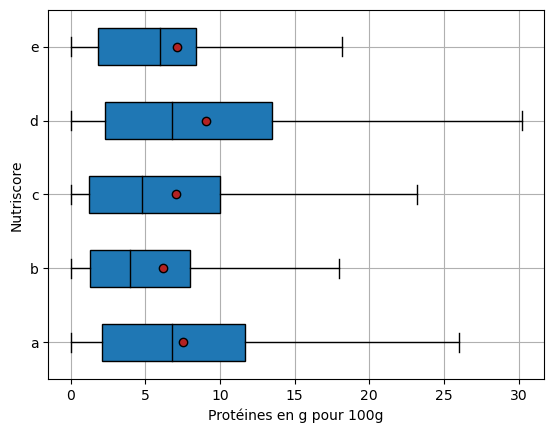

In [6]:
X1 = "nutrition_grade_fr" # qualitative
Y1 = "proteins_100g" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon1 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['proteins_100g'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon1[X1].sort_values().unique()
groupes = []
for m1 in modalites:
    groupes.append(sous_echantillon1[sous_echantillon1[X1]==m1][Y1])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Protéines en g pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()



In [7]:
#Puis coefficient de corrélation qui sert l’analyse :

eta_proteines = eta_squared(sous_echantillon1[X1],sous_echantillon1[Y1])
print("Eta carré entre Nutriscore et Protéines = ", eta_proteines)

Eta carré entre Nutriscore et Protéines =  0.01780274346002642


## Donc pas de corrélation entre nutriscore et protéines

# 1.3 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et la teneur en sel (salt_100g) 

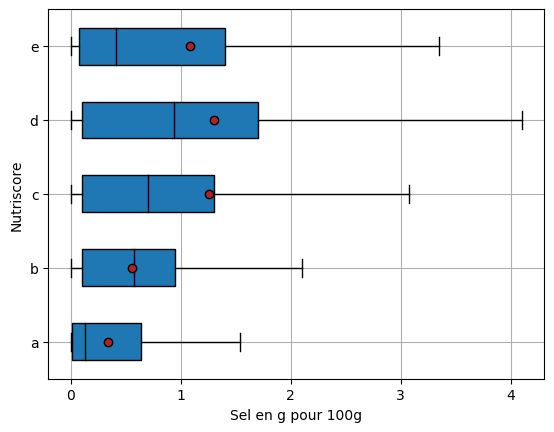

In [8]:
X2 = "nutrition_grade_fr" # qualitative
Y2 = "salt_100g" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon2 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['salt_100g'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon2[X2].sort_values().unique()
groupes = []
for m2 in modalites:
    groupes.append(sous_echantillon2[sous_echantillon2[X2]==m2][Y2])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Sel en g pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()






In [9]:
#Puis coefficient de corrélation qui sert l’analyse :

eta_sel = eta_squared(sous_echantillon2[X2],sous_echantillon2[Y2])
print("Eta carré entre Nutriscore et sel = ", eta_sel)

Eta carré entre Nutriscore et sel =  0.01296041389128876


## Donc pas de corrélation entre nutriscore et sel

# 1.4 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et la teneur en sucre (sugars_100g) 

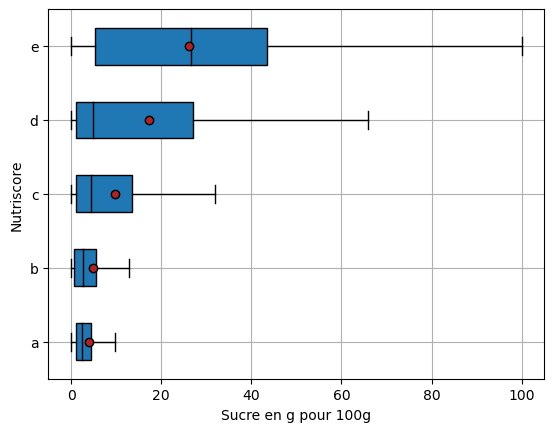

In [10]:
X3 = "nutrition_grade_fr" # qualitative
Y3 = "sugars_100g" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon3 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['sugars_100g'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon3[X3].sort_values().unique()
groupes = []
for m3 in modalites:
    groupes.append(sous_echantillon3[sous_echantillon3[X3]==m3][Y3])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Sucre en g pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()







In [11]:
#Puis coefficient de corrélation qui sert l’analyse :
eta_sucre = eta_squared(sous_echantillon3[X3],sous_echantillon3[Y3])
print("Eta carré entre Nutriscore et sucre = ", eta_sucre)

Eta carré entre Nutriscore et sucre =  0.18458686401935076


## Donc il y a une légère corrélation entre nutrition_grade_fr et sucre

# 1.5 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et la teneur en graisses (fat_100g) 

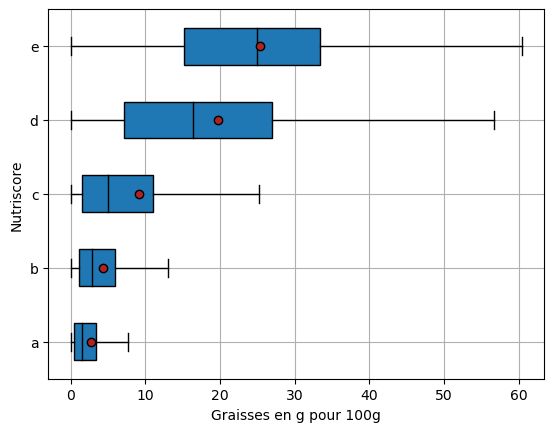

In [12]:
X4 = "nutrition_grade_fr" # qualitative
Y4 = "fat_100g" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon4 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['fat_100g'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon4[X4].sort_values().unique()
groupes = []
for m4 in modalites:
    groupes.append(sous_echantillon4[sous_echantillon4[X4]==m4][Y4])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Graisses en g pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()


In [13]:
#Puis coefficient de corrélation qui sert l’analyse :
eta_graisses = eta_squared(sous_echantillon4[X4],sous_echantillon4[Y4])    
print("Eta carré entre Nutriscore et Graisses = ", eta_graisses)

Eta carré entre Nutriscore et Graisses =  0.26122661179800055


## Donc il y a une légère corrélation entre nutrition_grade_fr et graisses

# 1.6 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et la teneur en graisses saturées (saturated-fat_100g) 

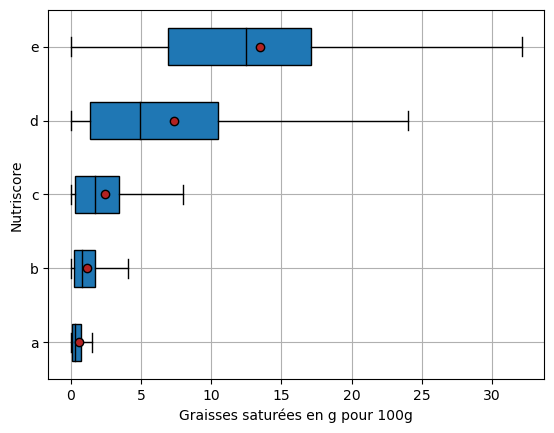

In [14]:
X5 = "nutrition_grade_fr" # qualitative
Y5 = "saturated-fat_100g" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon5 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['saturated-fat_100g'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon5[X5].sort_values().unique()
groupes = []
for m5 in modalites:
    groupes.append(sous_echantillon5[sous_echantillon5[X5]==m5][Y5])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Graisses saturées en g pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()

In [15]:
#Puis coefficient de corrélation qui sert l’analyse :
eta_graisses_saturees = eta_squared(sous_echantillon5[X5],sous_echantillon5[Y5])    
print("Eta carré entre Nutriscore et Graisses saturées = ", eta_graisses_saturees)

Eta carré entre Nutriscore et Graisses saturées =  0.3062683820044995


## Donc il y a une corrélation entre nutrition_grade_fr et graisses saturées

# 1.7 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et la teneur en glucides (carbohydrates_100g) 

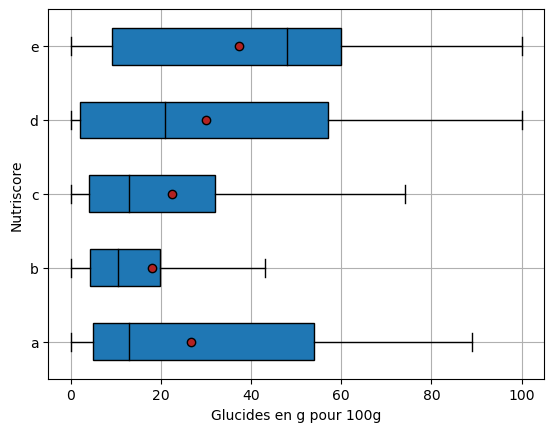

In [16]:
X6 = "nutrition_grade_fr" # qualitative
Y6 = "carbohydrates_100g" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon6 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['carbohydrates_100g'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon6[X6].sort_values().unique()
groupes = []
for m6 in modalites:
    groupes.append(sous_echantillon6[sous_echantillon6[X6]==m6][Y6])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Glucides en g pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()

In [17]:
#Puis coefficient de corrélation qui sert l’analyse :
eta_glucides = eta_squared(sous_echantillon6[X6],sous_echantillon6[Y6])    
print("Eta carré entre Nutriscore et Glucides = ", eta_glucides)

Eta carré entre Nutriscore et Glucides =  0.051531577975499336


## Donc pas de corrélation entre nutrition_grade_fr et glucides

# 1.8 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et la teneur en fibres (fiber_100g) 

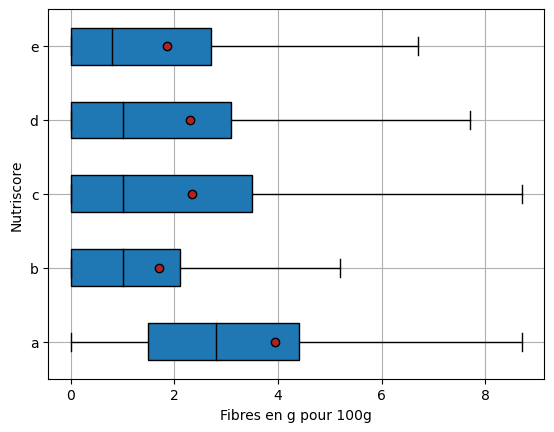

In [18]:
X7 = "nutrition_grade_fr" # qualitative
Y7 = "fiber_100g" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon7 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['fiber_100g'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon7[X7].sort_values().unique()
groupes = []
for m7 in modalites:
    groupes.append(sous_echantillon7[sous_echantillon7[X7]==m7][Y7])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Fibres en g pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()

In [19]:
#Puis coefficient de corrélation qui sert l’analyse :
eta_fibres = eta_squared(sous_echantillon7[X7],sous_echantillon7[Y7])    
print("Eta carré entre Nutriscore et Fibres = ", eta_fibres)

Eta carré entre Nutriscore et Fibres =  0.0393983842252207


## Donc pas de corrélation entre nutrition_grade_fr et glucides

# 1.9 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et la teneur en huile de palme (ingredients_from_palm_oil_n) 

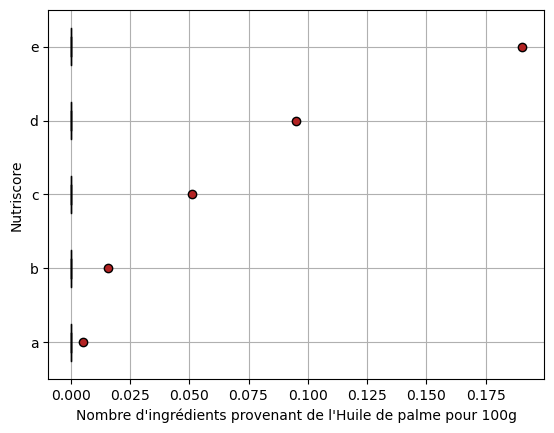

In [20]:
X8 = "nutrition_grade_fr" # qualitative
Y8 = "ingredients_from_palm_oil_n" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon8 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['ingredients_from_palm_oil_n'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon8[X8].sort_values().unique()
groupes = []
for m8 in modalites:
    groupes.append(sous_echantillon8[sous_echantillon8[X8]==m8][Y8])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Nombre d'ingrédients provenant de l'Huile de palme pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()

In [21]:
#Puis coefficient de corrélation qui sert l’analyse :
eta_palm = eta_squared(sous_echantillon8[X8],sous_echantillon8[Y8])    
print("Eta carré entre Nutriscore et Huile de Palme = ", eta_palm)

Eta carré entre Nutriscore et Huile de Palme =  0.05689806937691326


## Donc pas de corrélation entre nutrition_grade_fr et Huile de palme

# 1.10 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et additifs (additives_n)

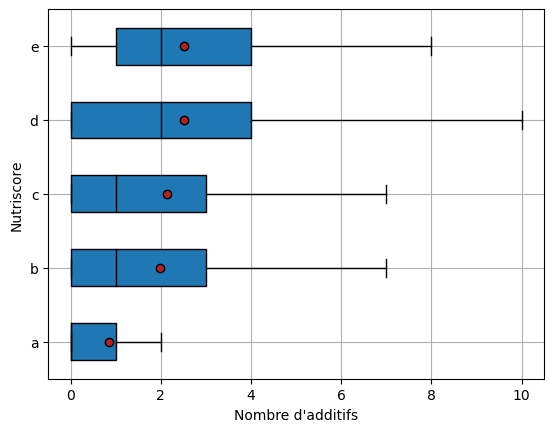

In [22]:
X9 = "nutrition_grade_fr" # qualitative
Y9 = "additives_n" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon9 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['additives_n'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon9[X9].sort_values().unique()
groupes = []
for m9 in modalites:
    groupes.append(sous_echantillon9[sous_echantillon9[X9]==m9][Y9])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Nombre d'additifs")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()

In [23]:
#Puis coefficient de corrélation qui sert l’analyse :
eta_add = eta_squared(sous_echantillon9[X9],sous_echantillon9[Y9])    
print("Eta carré entre Nutriscore et Huile de Palme = ", eta_add)

Eta carré entre Nutriscore et Huile de Palme =  0.05242872148432684


## Donc pas de corrélation entre Nutriscore et nombre d'additifs

# 1.11 Bilan des analyses ANOVA avant imputations :

In [24]:
print("Tableau récapitulatif des coefficients de corrélation entre la variable nutrition_grade_fr et plusieurs autres variables :")

recapitulatif = pd.DataFrame()
recapitulatif['Variables'] = ['energy_100g', 'proteins_100g', 'salt_100g', 'sugars_100g', 'fat_100g', 'saturated-fat_100g', "carbohydrates_100g", "fiber_100g", "ingredients_from_palm_oil_n", "additives_n"]
recapitulatif['Nom des variables'] = ['Energie', 'Protéines', 'Sel', 'Sucre', 'Graisses', 'Graisses saturées', 'Glucides', 'Fibres', 'Huile de palme', "Nombre d'additifs"]
recapitulatif['Coefficient de corrélation avec le nutriscore, en %'] = [round(eta_energie,2)*100,round(eta_proteines,2)*100, round(eta_sel,2)*100, round(eta_sucre,2)*100, round(eta_graisses,2)*100, round(eta_graisses_saturees,2)*100, round(eta_glucides,2)*100, round(eta_fibres,2)*100, round(eta_palm, 2)*100,round(eta_add, 2)*100 ]
recapitulatif

Tableau récapitulatif des coefficients de corrélation entre la variable nutrition_grade_fr et plusieurs autres variables :


,Variables,Nom des variables,"Coefficient de corrélation avec le nutriscore, en %"
0,energy_100g,Energie,29.0
1,proteins_100g,Protéines,2.0
2,salt_100g,Sel,1.0
3,sugars_100g,Sucre,18.0
4,fat_100g,Graisses,26.0
5,saturated-fat_100g,Graisses saturées,31.0
6,carbohydrates_100g,Glucides,5.0
7,fiber_100g,Fibres,4.0
8,ingredients_from_palm_oil_n,Huile de palme,6.0
9,additives_n,Nombre d'additifs,5.0


## On observe donc une certaine corrélation entre nutriscore et Energie, Sucre, Graisses et Graisses saturées

# 2. Analyse de données : Etude des corrélations entre variables (Matrice de corrélation des variables) :

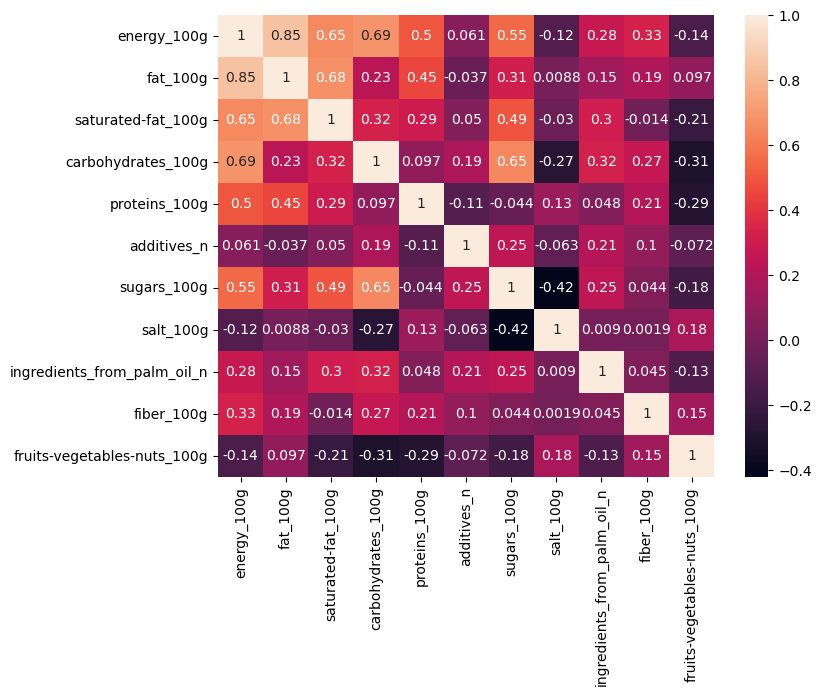

In [25]:
df_clean_sans_na = df_clean.dropna()
df_clean_sans_na = df_clean_sans_na.drop(['code'], axis = 1)
corr_df_clean = df_clean_sans_na.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df_clean, annot=True)
plt.show()

## On remarque une corrélation entre energy_100g et fat_100g surtout, et aussi avec carbohydrates_100g, saturated-fat_100g et sugar_100g.

# 3. Traitement des valeurs manquantes en fonction des analyses précédentes

## 3.1 Colonne Energie

In [26]:
#Nombre de valeurs manquantes avant imputation
df_clean['energy_100g'].isnull().sum()

8487

## Visualisons le lien entre fat_100g et energy_100g sur un graphique :

<AxesSubplot:xlabel='fat_100g', ylabel='energy_100g'>

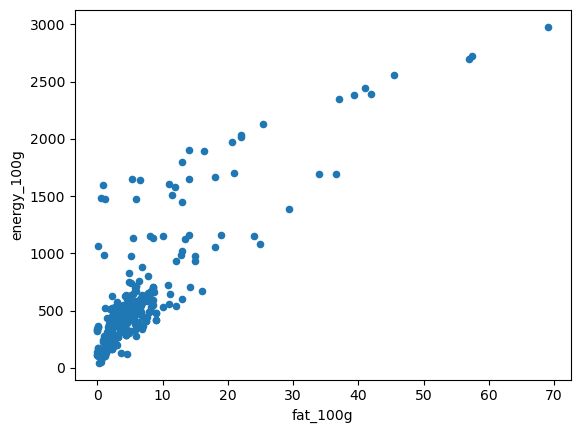

In [27]:
df_clean_sans_na.plot.scatter("fat_100g","energy_100g",  colormap='viridis')



## Imputation des valeurs manquantes de energy_100g par régression linéaire

R2 score :  0.5524223565487958


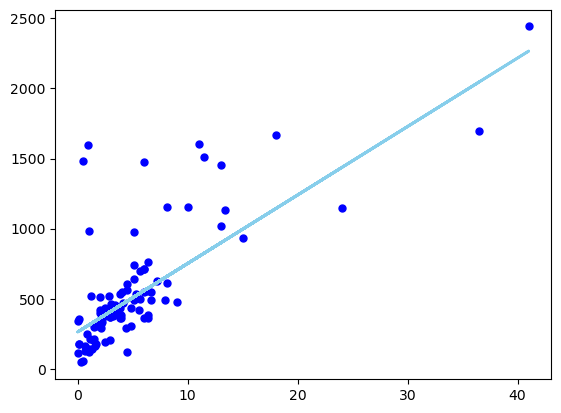

In [28]:
#séparation jeu de données d'entraînement / jeu de données test

xtrain1, xtest1, ytrain1, ytest1 = train_test_split(df_clean_sans_na[['fat_100g']], df_clean_sans_na[["energy_100g"]], test_size=0.3)

#Créons ensuite la baseline, et calculons le R2 (la somme quadratique des résidus), comme valeur d'évaluation de notre regression.

lr = LinearRegression()
lr_baseline = lr.fit(xtrain1[["fat_100g"]], ytrain1)
baseline_pred = lr_baseline.predict(xtest1[["fat_100g"]])

plt.plot(xtest1[["fat_100g"]], ytest1, 'bo', markersize = 5)
plt.plot(xtest1[["fat_100g"]], baseline_pred, color="skyblue", linewidth = 2)



def sumsq(x,y):
    return sum((x - y)**2)

def r2score(pred, target):
    return 1 - sumsq(pred, target) / sumsq(target, np.mean(target))


    
score_bl  = r2score(baseline_pred[:,0], ytest1['energy_100g'])

print ("R2 score : ", score_bl)



In [29]:
df_clean_imput = df_clean.loc[(df_clean['energy_100g'].isnull() == True) & (df_clean['fat_100g'].isnull() == False)]
df_clean_imput

,code,created_datetime,product_name,pnns_groups_1,quantity,brands,label_bio,stores,countries_fr,ingredients_text,allergens,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,additives_n,sugars_100g,salt_100g,ingredients_from_palm_oil_n,fiber_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr
112610,2.000100e+11,2015-05-08 16:30:50+00:00,Comté Au Lait Cru (34 % MG),Milk and dairy products,"0,282 kg",Monoprix,Non bio,Monoprix,France,,NaN,NaN,34.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
112617,2.000230e+11,2014-11-05 12:05:21+00:00,Brie pasteurisé,Milk and dairy products,"0,256 kg",Sans marque,Non bio,Carrefour Market,France,Fromage au lait pasteurisé de vache. Mat Gr 31 %.,NaN,NaN,31.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
112634,2.001441e+11,2013-08-10 09:58:06+00:00,P'tit Basque (34% MG) - 642 g,Milk and dairy products,642 g,iSTARA,Non bio,Carrefour Market,France,"lait de brebis pasteurisé, sel, présure, chlorure de calcium, ferments lactiques, colorants de la croûte : caramel naturel, rocou, conservateur : E235",NaN,NaN,34.0,NaN,NaN,NaN,4.0,NaN,NaN,0.0,NaN,NaN,NaN
112648,2.004890e+11,2015-08-03 09:57:15+00:00,Steak haché pur boeuf,Fish Meat Eggs,500 g,Boucheries André,Non bio,Boucheries André,France,race charolaise,NaN,NaN,15.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
112649,2.004890e+11,2016-10-18 11:06:38+00:00,Race Charolaise Steak haché &quot;Façon André&quot; pur bœuf 15% MG,Fish Meat Eggs,"0,514 kg",Boucheries André,Non bio,NaN,France,Steak haché,NaN,NaN,15.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313572,8.710737e+12,2013-12-17 11:06:16+00:00,Beurre fin non salé - Père Noël,Fat and sauces,100 g,D. van der Pol,Non bio,NaN,France,_Beurre_ fin.,Beurre,NaN,82.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
313599,8.710866e+12,2015-12-05 12:28:06+00:00,Emmental tranches (29% MG),Milk and dairy products,300 g,"Sans marque,Brans Kaas",Non bio,NaN,France,"_Lait_ de vache pasteurisé, sel, ferments _lactiques_, présure.","Lait, lactiques",NaN,29.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
314929,8.713600e+12,2016-08-23 14:03:51+00:00,Mix Dextrose,Sugary snacks,195 g,Look-O-Look International,Non bio,NaN,France,NaN,NaN,NaN,1.5,1.4,88.0,0.0,NaN,86.0,0.0200,NaN,0.0,NaN,NaN
316935,8.850987e+12,2014-08-17 02:09:26+00:00,Nouilles instantanées au goût de canard Pa Lo - 55 g - Mama,Composite foods,55 g,Mama,Non bio,Tang Frères,"France,Suisse,États-Unis","Nouilles (farine de blé, huile de palmier, sel, sucre, correcteur d'acidité E500, correcteur d'acidité E501, épaississant E466, sauce de soja) - Assaisonnement (sel, sucre, exhausteur de goût E621, exhausteur de goût E635, arôme de canard, colorant E150a, poireau) - Huile d'assaisonnement (huile de palmier, ail) - Poudre de piment",NaN,NaN,2.6,1.4,6.4,1.2,6.0,0.7,0.8000,0.0,NaN,NaN,NaN


In [30]:
#Nombre de valeurs manquantes à imputer par cette méthode
df_clean_imput['energy_100g'].isnull().sum()

401

In [31]:
#Imputation et Vérification
df_clean_imput['energy_100g'] = lr_baseline.predict(df_clean_imput[["fat_100g"]])
df_clean_imput

/var/folders/11/rr01bdt55sb1r3f1t4_m_l2h0000gn/T/ipykernel_14382/3205729444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_imput['energy_100g'] = lr_baseline.predict(df_clean_imput[["fat_100g"]])


,code,created_datetime,product_name,pnns_groups_1,quantity,brands,label_bio,stores,countries_fr,ingredients_text,allergens,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,additives_n,sugars_100g,salt_100g,ingredients_from_palm_oil_n,fiber_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr
112610,2.000100e+11,2015-05-08 16:30:50+00:00,Comté Au Lait Cru (34 % MG),Milk and dairy products,"0,282 kg",Monoprix,Non bio,Monoprix,France,,NaN,1924.305213,34.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
112617,2.000230e+11,2014-11-05 12:05:21+00:00,Brie pasteurisé,Milk and dairy products,"0,256 kg",Sans marque,Non bio,Carrefour Market,France,Fromage au lait pasteurisé de vache. Mat Gr 31 %.,NaN,1777.733549,31.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
112634,2.001441e+11,2013-08-10 09:58:06+00:00,P'tit Basque (34% MG) - 642 g,Milk and dairy products,642 g,iSTARA,Non bio,Carrefour Market,France,"lait de brebis pasteurisé, sel, présure, chlorure de calcium, ferments lactiques, colorants de la croûte : caramel naturel, rocou, conservateur : E235",NaN,1924.305213,34.0,NaN,NaN,NaN,4.0,NaN,NaN,0.0,NaN,NaN,NaN
112648,2.004890e+11,2015-08-03 09:57:15+00:00,Steak haché pur boeuf,Fish Meat Eggs,500 g,Boucheries André,Non bio,Boucheries André,France,race charolaise,NaN,996.018008,15.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
112649,2.004890e+11,2016-10-18 11:06:38+00:00,Race Charolaise Steak haché &quot;Façon André&quot; pur bœuf 15% MG,Fish Meat Eggs,"0,514 kg",Boucheries André,Non bio,NaN,France,Steak haché,NaN,996.018008,15.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313572,8.710737e+12,2013-12-17 11:06:16+00:00,Beurre fin non salé - Père Noël,Fat and sauces,100 g,D. van der Pol,Non bio,NaN,France,_Beurre_ fin.,Beurre,4269.451836,82.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
313599,8.710866e+12,2015-12-05 12:28:06+00:00,Emmental tranches (29% MG),Milk and dairy products,300 g,"Sans marque,Brans Kaas",Non bio,NaN,France,"_Lait_ de vache pasteurisé, sel, ferments _lactiques_, présure.","Lait, lactiques",1680.019106,29.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
314929,8.713600e+12,2016-08-23 14:03:51+00:00,Mix Dextrose,Sugary snacks,195 g,Look-O-Look International,Non bio,NaN,France,NaN,NaN,336.445520,1.5,1.4,88.0,0.0,NaN,86.0,0.0200,NaN,0.0,NaN,NaN
316935,8.850987e+12,2014-08-17 02:09:26+00:00,Nouilles instantanées au goût de canard Pa Lo - 55 g - Mama,Composite foods,55 g,Mama,Non bio,Tang Frères,"France,Suisse,États-Unis","Nouilles (farine de blé, huile de palmier, sel, sucre, correcteur d'acidité E500, correcteur d'acidité E501, épaississant E466, sauce de soja) - Assaisonnement (sel, sucre, exhausteur de goût E621, exhausteur de goût E635, arôme de canard, colorant E150a, poireau) - Huile d'assaisonnement (huile de palmier, ail) - Poudre de piment",NaN,390.188463,2.6,1.4,6.4,1.2,6.0,0.7,0.8000,0.0,NaN,NaN,NaN


In [32]:
verif = df_clean_imput.loc[df_clean_imput['energy_100g'].index == 112634, 'energy_100g']
verif.item()

1924.3052126074722

In [33]:
#Vérification : plus de Nan dans df_clean_imput pour energy_100g
df_clean_imput['energy_100g'].isnull().sum()

0

In [34]:
# Insertion des valeurs calculées:
df_clean['energy_100g'].fillna(df_clean_imput['energy_100g'], inplace = True)

In [35]:
#Vérification : pour l'index 112634 :
a = df_clean.loc[df_clean.index == 112634, 'energy_100g']
if verif.item() == a.item() :
    print('Il y a bien eu insertion correcte, energy_100g = ', a.item(), 'pour index = 112634')
else :
    print("Erreur d'insertion")
        

Il y a bien eu insertion correcte, energy_100g =  1924.3052126074722 pour index = 112634


In [36]:
#Nombre de données manquantes après insertion :
df_clean['energy_100g'].isnull().sum()

8086

## Visualisons le lien entre carbohydrates_100g et energy_100g sur un graphique :

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='energy_100g'>

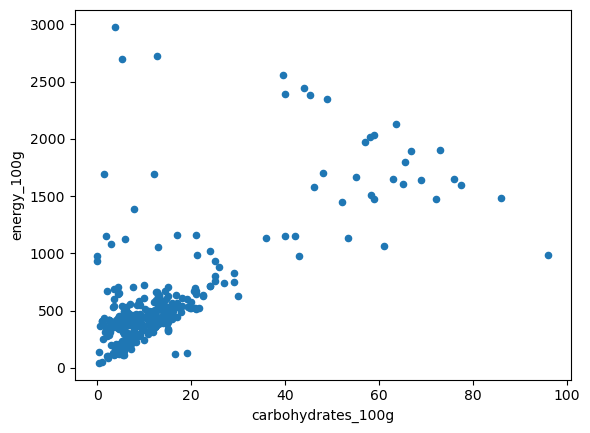

In [37]:
df_clean_sans_na2 = df_clean.dropna()
df_clean_sans_na2 = df_clean_sans_na2.drop(['code'], axis = 1)
df_clean_sans_na2.plot.scatter("carbohydrates_100g","energy_100g",  colormap='viridis')

In [38]:
#séparation jeu de données d'entraînement / jeu de données test
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(df_clean_sans_na[['carbohydrates_100g']], df_clean_sans_na[["energy_100g"]], test_size=0.3)

R2 score :  0.4096068068122083


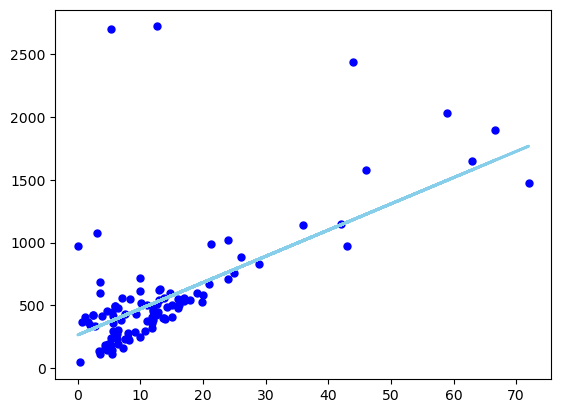

In [39]:
#Créons ensuite la baseline, et calculons le R2 (la somme quadratique des résidus), comme valeur d'évaluation de notre regression.

lr = LinearRegression()
lr_baseline = lr.fit(xtrain2[["carbohydrates_100g"]], ytrain2)
baseline_pred = lr_baseline.predict(xtest2[["carbohydrates_100g"]])

plt.plot(xtest2[["carbohydrates_100g"]], ytest2, 'bo', markersize = 5)
plt.plot(xtest2[["carbohydrates_100g"]], baseline_pred, color="skyblue", linewidth = 2)


def sumsq(x,y):
    return sum((x - y)**2)

def r2score(pred, target):
    return 1 - sumsq(pred, target) / sumsq(target, np.mean(target))

score_bl2 = r2score(baseline_pred[:,0], ytest2['energy_100g'])

print ("R2 score : ", score_bl2)



In [40]:
df_clean_imput2 = df_clean.loc[(df_clean['carbohydrates_100g'].isnull() == False) & (df_clean['energy_100g'].isnull() == True)] 
df_clean_imput2

,code,created_datetime,product_name,pnns_groups_1,quantity,brands,label_bio,stores,countries_fr,ingredients_text,allergens,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,additives_n,sugars_100g,salt_100g,ingredients_from_palm_oil_n,fiber_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr
196148,3.165950e+12,2015-06-22 07:44:11+00:00,Les Saladières Parisienne (lot de 2),Composite foods,2 x 250 g,Saupiquet,Non bio,NaN,France,"Légumes (pommes de terre (14%), carottes (11%), champignons (8%), haricots verts, persil), sauce [eau, huile de tournesol, vinaigre de vin blanc, _moutarde_ de Dijon (eau, graines de _moutarde_, vinaigre, sel), sucre, sel, arômes, amidons, transformés de maïs, épaississants : gomme guar et gomme xanthane], _thon_ (22%).","moutarde, moutarde, thon",NaN,NaN,NaN,5.3,6.7,2.0,2.3,1.100,0.0,NaN,NaN,NaN
206633,3.250391e+12,2015-02-21 15:58:39+00:00,Confiture Extra d'Abricots,Sugary snacks,370 g,Netto,Non bio,Netto,France,"Abricots, sirop de glucose-fructose, sucre, gélifiant : pectine; acidifiant : acide citrique; antioxydant : acide ascorbique. Préparée avec 50 g de fruits pour 100 g.",NaN,NaN,NaN,NaN,60.0,NaN,3.0,NaN,NaN,0.0,NaN,50.0,NaN
215369,3.263851e+12,2014-03-19 16:59:57+00:00,Sardines à l'huile d'olive et citron,Fish Meat Eggs,115 g,Leader Price,Non bio,Leader Price,France,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.762,NaN,0.0,NaN,NaN
233233,3.442644e+12,2015-04-09 19:33:52+00:00,Confiture de mirabelles,Sugary snacks,370 g,Jours Heureux,Non bio,NaN,France,"Mirabelles de Lorraine (52%), sucre, pectine",NaN,NaN,NaN,NaN,62.0,NaN,1.0,62.0,NaN,0.0,NaN,52.0,NaN
248704,3.660992e+12,2013-05-18 11:09:47+00:00,Sucre blanc en poudre,Sugary snacks,1 kg,Bien Vu !,Non bio,Hyper U,France,Sucre blanc,NaN,NaN,NaN,NaN,100.0,NaN,0.0,100.0,NaN,0.0,NaN,NaN,NaN
275489,5.202659e+12,2015-11-28 12:51:36+00:00,Choco Fine Frozen,Sugary snacks,120 g,Chocotime,Non bio,Action,France,"Chocolat au lait (50 %) : Sucre, beurre de cacao, _lait_ en poudre, lactosérum en poudre (_lait_), masse de cacao, émulsifiants : E476, lécithine de _soja_, vanilline. Fourrage (50 %) : sucre, _lait_ entier en poudre, graisses végétales (palmiste, oléine de palme), lactose (_lait_), lécithine de _soja_, vanilline, céréales croustillantes (5 %) (farine de blé, _gluten_ de blé).","lait, lait, soja, lait, lait, soja, gluten",NaN,NaN,24.0,57.0,4.2,2.0,56.0,0.120,2.0,0.7,NaN,NaN
278521,5.410472e+12,2014-12-18 17:43:10+00:00,Elvira,Sugary snacks,130 g,Jules Destrooper,Non bio,NaN,France,"Farine de _froment_, chocolat noir (22 %) (pâte de cacao, sucre, beurre de cacao, matière grasse du _lait_ anhydre, émulsifiant : lécithine de _soja_), sucre, beurre (17 %) (_lait_), _oeufs_, extrait naturelle vanille (0,4 %), sel de mer.","froment, lait, soja, lait, oeufs",NaN,NaN,NaN,62.0,6.7,1.0,33.0,0.100,0.0,NaN,NaN,NaN


In [41]:
#Nombre de valeurs manquantes à imputer par cette méthode
df_clean_imput2['energy_100g'].isnull().sum()

7

In [42]:
#Imputation et Vérification
df_clean_imput2['energy_100g'] = lr_baseline.predict(df_clean_imput2[["carbohydrates_100g"]])
df_clean_imput2

/var/folders/11/rr01bdt55sb1r3f1t4_m_l2h0000gn/T/ipykernel_14382/2443861833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_imput2['energy_100g'] = lr_baseline.predict(df_clean_imput2[["carbohydrates_100g"]])


,code,created_datetime,product_name,pnns_groups_1,quantity,brands,label_bio,stores,countries_fr,ingredients_text,allergens,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,additives_n,sugars_100g,salt_100g,ingredients_from_palm_oil_n,fiber_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr
196148,3.165950e+12,2015-06-22 07:44:11+00:00,Les Saladières Parisienne (lot de 2),Composite foods,2 x 250 g,Saupiquet,Non bio,NaN,France,"Légumes (pommes de terre (14%), carottes (11%), champignons (8%), haricots verts, persil), sauce [eau, huile de tournesol, vinaigre de vin blanc, _moutarde_ de Dijon (eau, graines de _moutarde_, vinaigre, sel), sucre, sel, arômes, amidons, transformés de maïs, épaississants : gomme guar et gomme xanthane], _thon_ (22%).","moutarde, moutarde, thon",374.936310,NaN,NaN,5.3,6.7,2.0,2.3,1.100,0.0,NaN,NaN,NaN
206633,3.250391e+12,2015-02-21 15:58:39+00:00,Confiture Extra d'Abricots,Sugary snacks,370 g,Netto,Non bio,Netto,France,"Abricots, sirop de glucose-fructose, sucre, gélifiant : pectine; acidifiant : acide citrique; antioxydant : acide ascorbique. Préparée avec 50 g de fruits pour 100 g.",NaN,1517.957740,NaN,NaN,60.0,NaN,3.0,NaN,NaN,0.0,NaN,50.0,NaN
215369,3.263851e+12,2014-03-19 16:59:57+00:00,Sardines à l'huile d'olive et citron,Fish Meat Eggs,115 g,Leader Price,Non bio,Leader Price,France,NaN,NaN,264.186519,NaN,NaN,0.0,NaN,NaN,0.0,0.762,NaN,0.0,NaN,NaN
233233,3.442644e+12,2015-04-09 19:33:52+00:00,Confiture de mirabelles,Sugary snacks,370 g,Jours Heureux,Non bio,NaN,France,"Mirabelles de Lorraine (52%), sucre, pectine",NaN,1559.750114,NaN,NaN,62.0,NaN,1.0,62.0,NaN,0.0,NaN,52.0,NaN
248704,3.660992e+12,2013-05-18 11:09:47+00:00,Sucre blanc en poudre,Sugary snacks,1 kg,Bien Vu !,Non bio,Hyper U,France,Sucre blanc,NaN,2353.805220,NaN,NaN,100.0,NaN,0.0,100.0,NaN,0.0,NaN,NaN,NaN
275489,5.202659e+12,2015-11-28 12:51:36+00:00,Choco Fine Frozen,Sugary snacks,120 g,Chocotime,Non bio,Action,France,"Chocolat au lait (50 %) : Sucre, beurre de cacao, _lait_ en poudre, lactosérum en poudre (_lait_), masse de cacao, émulsifiants : E476, lécithine de _soja_, vanilline. Fourrage (50 %) : sucre, _lait_ entier en poudre, graisses végétales (palmiste, oléine de palme), lactose (_lait_), lécithine de _soja_, vanilline, céréales croustillantes (5 %) (farine de blé, _gluten_ de blé).","lait, lait, soja, lait, lait, soja, gluten",1455.269179,NaN,24.0,57.0,4.2,2.0,56.0,0.120,2.0,0.7,NaN,NaN
278521,5.410472e+12,2014-12-18 17:43:10+00:00,Elvira,Sugary snacks,130 g,Jules Destrooper,Non bio,NaN,France,"Farine de _froment_, chocolat noir (22 %) (pâte de cacao, sucre, beurre de cacao, matière grasse du _lait_ anhydre, émulsifiant : lécithine de _soja_), sucre, beurre (17 %) (_lait_), _oeufs_, extrait naturelle vanille (0,4 %), sel de mer.","froment, lait, soja, lait, oeufs",1559.750114,NaN,NaN,62.0,6.7,1.0,33.0,0.100,0.0,NaN,NaN,NaN


In [43]:
verif2 = df_clean_imput2.loc[df_clean_imput2.index == 196148, 'energy_100g']
verif2.item()

374.93630975009256

In [44]:
#Vérification : plus de Nan dans df_clean_imput2 pour energy_100g
df_clean_imput2['energy_100g'].isnull().sum()

0

In [45]:
# Insertion des valeurs calculées:
df_clean['energy_100g'].fillna(df_clean_imput2['energy_100g'], inplace = True)


In [46]:
#Vérification : pour l'index 196148 :
b = df_clean.loc[df_clean.index == 196148, 'energy_100g']
if verif2.item() == b.item() :
    print('Il y a bien eu insertion correcte, energy_100g = ', b.item(), 'pour index = 196148')
else :
    print("Erreur d'insertion")



Il y a bien eu insertion correcte, energy_100g =  374.93630975009256 pour index = 196148


## 3.2 Colonne huile de palme :
## a) Imputation de valeurs dans ingredients_from_palm_oil_n : regardons la liste des ingrédients des produits, voir si l'huile de palme a toujours été notée :

In [47]:
df_clean.loc[df_clean['ingredients_from_palm_oil_n'].isnull() == True]


,code,created_datetime,product_name,pnns_groups_1,quantity,brands,label_bio,stores,countries_fr,ingredients_text,allergens,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,additives_n,sugars_100g,salt_100g,ingredients_from_palm_oil_n,fiber_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr
190,1.018732e+07,2017-02-17 10:05:54+00:00,Mini Confettis,Sugary snacks,NaN,Alice Délice,Non bio,NaN,France,NaN,NaN,1753.0,NaN,0.80,NaN,0.60,NaN,87.70,0.010,NaN,0.9,NaN,d
191,1.020726e+07,2017-03-22 17:17:11+00:00,Praliné Amande Et Noisette,Sugary snacks,NaN,Alice Délice,Non bio,NaN,France,NaN,NaN,2406.0,NaN,2.90,NaN,9.50,NaN,50.30,0.003,NaN,3.9,NaN,d
234,6.916102e+07,2017-03-22 19:59:36+00:00,Tarte Poireaux Et Lardons,Beverages,NaN,Bo Frost,Non bio,NaN,France,NaN,NaN,1079.0,NaN,11.00,NaN,7.50,NaN,1.00,0.800,NaN,1.4,NaN,d
307,6.060098e+08,2017-02-01 11:13:57+00:00,Beignets framboises,Sugary snacks,NaN,Intermarché,Non bio,NaN,France,NaN,NaN,1272.0,NaN,1.70,NaN,5.80,NaN,12.70,0.700,NaN,0.0,NaN,c
454,1.169300e+04,2015-08-05 19:25:21+00:00,All Buter Belgian White Chocolate Chunk Cookies,Sugary snacks,225 g,marks&spencer,Non bio,NaN,"France,Royaume-Uni",NaN,NaN,2172.0,29.1,17.00,58.4,5.50,NaN,33.50,1.000,NaN,1.3,NaN,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320698,9.610389e+07,2016-12-07 13:51:46+00:00,Eat Natural Protein Packed,Cereals and potatoes,NaN,Biobio,Non bio,NaN,France,NaN,NaN,1996.0,NaN,10.00,NaN,22.00,NaN,22.00,1.000,NaN,6.0,NaN,d
320734,9.778564e+12,2017-01-23 16:57:57+00:00,Nature cheddar and red onion crisps,Salty snacks,NaN,Marks and Spencer,Non bio,NaN,"France,Royaume-Uni",NaN,NaN,2155.0,NaN,3.40,NaN,7.80,NaN,1.80,1.350,NaN,5.6,NaN,c
320740,9.782211e+12,2017-03-08 20:05:58+00:00,Verrine Cheescake Myrtille,Sugary snacks,NaN,Kayser,Non bio,NaN,France,NaN,NaN,1084.0,NaN,12.00,NaN,8.70,NaN,10.50,0.290,NaN,0.0,NaN,d
320751,9.847548e+12,2015-07-25 09:47:06+00:00,Tartines craquantes bio au sarrasin,Cereals and potatoes,NaN,Le Pain des fleurs,Bio,NaN,France,NaN,NaN,1643.0,2.8,0.60,74.8,13.00,NaN,2.60,0.680,NaN,5.9,NaN,a


In [48]:
df_clean.loc[df_clean['ingredients_from_palm_oil_n'].isnull() == True].shape[0]


11733

In [49]:
df_clean.loc[df_clean['ingredients_text'].str.contains("palm oil", case = False, na = False)]


,code,created_datetime,product_name,pnns_groups_1,quantity,brands,label_bio,stores,countries_fr,ingredients_text,allergens,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,additives_n,sugars_100g,salt_100g,ingredients_from_palm_oil_n,fiber_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr
509,2.309200e+04,2017-04-13 12:48:15+00:00,Maple syrup & pecan cookie,Sugary snacks,NaN,Marks & Spencer,Non bio,NaN,France,"}ookles syrup INGREDIENTS Wheatflour contains Gluten (With Wheatflou Calcium Carbonate, Iron, Niacin, Thiamin) • Sugar • Pecan ; (12%) . Butter (Milk) • Palm Oil • Rapeseed Oit • Maple Syrup (4.596) . Invert Sugar Syrup • Fructose • Brown Sugar • Dried med Milk • Maltodextrin • Molasses • Dried Free Range Egg • Raisir • Sodium Bicarbonate, E450 • Salt. allergens see ingredients in bold. suitable for Soya allergy sufferers due to manufacturing methods. iubleforvegetariang TORAGE Store in a cool, dry place, away from sunlight heopened, store in an airtight container. 0 cookies tendres avec des morceaux de noix de pécan et du sirop d'érable Farine de blé contient Gluten (avec Farine de blé, calcium, Fer, Niacine, Thiamine) • Sucre • Noix de • Beurre (Lait) • Huile de palme • Huile de colza • Sirop • Sirop de sucre inverti • Fructose • Sucre roux • Lait eécrémé • Maltodextrine • Sirop de sucre • Œufs de poules : en poudre • Poudre à lever : Bicarbonate de de préférence dans un endroit frais et",NaN,2033.0,26.80,7.60,54.20,6.00,4.0,29.40,0.370000,1.0,1.90,0.0,d
1343,9.800892e+09,2013-07-02 14:14:24+00:00,Nutella,Sugary snacks,1 kg,"Ferrero,Nutella",Non bio,NaN,"Canada,France,Suisse,États-Unis","Sugar, palm oil, _hazelnuts_, cocoa, skim _milk_, reduced minerals whey (_milk_), lecithin as emulsifier (_soja_), vanillin : an artificial flavor.","hazelnuts, milk, milk, soja",2260.0,32.40,10.80,56.80,5.41,0.0,56.80,0.103000,0.0,2.70,NaN,e
6757,1.115285e+10,2017-03-09 09:57:08+00:00,Pois Wasabi HAPI 140G Thailande,Salty snacks,NaN,Hapi trading,Non bio,NaN,France,"Green peas, glutinous rice flour, wheat flour, palm oil, sunflower oil, sugar, horseradish, salt, fd&c yellow #5 and fd&c blue #1.",NaN,1941.0,14.29,5.40,64.29,14.00,1.0,14.00,0.772160,0.0,0.00,NaN,d
15163,1.932002e+10,2014-02-04 22:04:54+00:00,Shortbread Cookies,Sugary snacks,42 g,Lorna Doone,Non bio,NaN,"France,États-Unis","UNBLEACHED ENRICHED FLOUR (WHEAT FLOUR, NIACIN, REDUCED IRON, THIAMINE MONONITRATE [VITAMLN B1}, RIBOFLAVIN (VITAMIN B2}, FOLIC ACID), SOYBEAN AND/OR PALM OIL, SUGAR, PARTIALLY HYDROGENATED COTTONSEED OIL, CORN FLOUR, SALT, HIGH FRUCTOSE CORN, SYRUP BAKING SODA, SOY LECITHIN, CORNSTARCH, ARTIFICIAL FLAVOR.",NaN,2040.0,23.30,5.81,67.40,4.65,3.0,18.60,1.360000,0.0,2.33,NaN,d
28634,3.355910e+05,2014-11-13 21:42:22+00:00,Gluten Free Christmas Pudding,Composite foods,100g,Marks & Spencer,Non bio,Marks & Spencer,"France,Royaume-Uni","Dried Vine Fruits 43% (Sultanas, Raisins, Currants), Sugar, Cider 6%, Vegetable Suet (Palm Oil, Rice Flour, Sunflower Oil, Pasteurised Free Range Egg, Gluten Free Breadcrumbs (Rice Flour, Chickpea Flour, Cornflour, Salt, Dextrose), Dark Rum 3%, Brandy 3%, Gluten Free Flour (Rice Flour, Potato Flour, Maize Flour) , Humectant: Glycerol, Black Treacle, Molasses, Orange Peel, Amontillado Sherry 1%, Nibbed Almonds, Glucose Syrup, Lemon Peel, Ground Spices (Coriander, Cinnamon, Ginger, Nutmeg, Caraway, Cloves), Salt, Acidity Regulator: Citric Acid",NaN,1242.0,4.70,2.40,58.10,3.10,2.0,49.20,0.230124,0.0,3.40,NaN,d
36986,4.031390e+05,2013-10-03 10:04:39+00:00,Black Olive crackers,Salty snacks,150g,Marks & Spencer,Non bio,Marks & Spencer,"France,Royaume-Uni","Wheatflour, Vegetable Oils (Coconut Oil, Palm Oil), Sugar, Baking Powder (Raising Agent: Sodium Bicarbonate, E450, E503), Black Olive Pieces 2%, Whey Solide (from Cow's Milk), Poppy Seeds, Dried Yeast Extract, Salt, Flavourings (Black Olive, Garlic, Pepper), Cracked White Pepper, Black Olive Pieces (contain Black Olives), Acidity Regulator: Ascorbic Acid, A

In [50]:
#Nombre de produits contenant de l'huile de palme d'après la liste des ingrédients
df_clean.loc[df_clean['ingredients_text'].str.contains("palm oil", case = False, na = False)].shape[0]

21

In [51]:
#Produits ayant de l'huile palme et dont la colonne ingredients_from_palm_oil_n est vide
df_clean.loc[(df_clean['ingredients_from_palm_oil_n'].isnull() == True) & (df_clean['ingredients_text'].str.contains("palm oil", case = False, na = False))]
                                                                                                                                

,code,created_datetime,product_name,pnns_groups_1,quantity,brands,label_bio,stores,countries_fr,ingredients_text,allergens,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,additives_n,sugars_100g,salt_100g,ingredients_from_palm_oil_n,fiber_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr


In [52]:
#Nombre de produits ayant de l'huile palme et dont la colonne ingredients_from_palm_oil_n est vide
df_clean.loc[(df_clean['ingredients_from_palm_oil_n'].isnull() == True) & (df_clean['ingredients_text'].str.contains("palm oil", case = False, na = False))].shape[0]


0

## b) Imputation de 0 pour les valeurs manquantes dans ingredients_from_palm_oil_n :

In [53]:
df_clean['ingredients_from_palm_oil_n'].fillna(0, inplace = True)
df_clean.loc[:, 'ingredients_from_palm_oil_n'].tolist()


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

## 3.3 Imputation de la médiane par catégorie à la place des valeurs manquantes pour plusieurs colonnes :

In [54]:
#Regardons la médiane par catégorie pour le sel :
mediane_sel_par_categorie = df_clean.groupby('pnns_groups_1')['salt_100g'].median()
mediane_sel_par_categorie


pnns_groups_1
Beverages                  0.01270
Cereals and potatoes       0.40132
Composite foods            0.93800
Fat and sauces             1.30000
Fish Meat Eggs             1.73000
Fruits and vegetables      0.21000
Milk and dairy products    0.15000
Salty snacks               1.45000
Sugary snacks              0.24000
Name: salt_100g, dtype: float64

In [55]:
#Remplacement des valeurs manquantes par la médiane par catégorie :
df_clean['salt_100g'] = df_clean['salt_100g'].fillna(df_clean.groupby('pnns_groups_1')['salt_100g'].transform('median'))
df_clean['sugars_100g'] = df_clean['sugars_100g'].fillna(df_clean.groupby('pnns_groups_1')['sugars_100g'].transform('median'))
df_clean['energy_100g'] = df_clean['energy_100g'].fillna(df_clean.groupby('pnns_groups_1')['energy_100g'].transform('median'))
df_clean['fat_100g'] = df_clean['fat_100g'].fillna(df_clean.groupby('pnns_groups_1')['fat_100g'].transform('median'))
df_clean['saturated-fat_100g'] = df_clean['saturated-fat_100g'].fillna(df_clean.groupby('pnns_groups_1')['saturated-fat_100g'].transform('median'))
df_clean['carbohydrates_100g'] = df_clean['carbohydrates_100g'].fillna(df_clean.groupby('pnns_groups_1')['carbohydrates_100g'].transform('median'))
df_clean['proteins_100g'] = df_clean['proteins_100g'].fillna(df_clean.groupby('pnns_groups_1')['proteins_100g'].transform('median'))
df_clean['fiber_100g'] = df_clean['fiber_100g'].fillna(df_clean.groupby('pnns_groups_1')['fiber_100g'].transform('median'))
df_clean['additives_n'] = df_clean['additives_n'].fillna(df_clean.groupby('pnns_groups_1')['additives_n'].transform('median'))



In [56]:
#Pourcentage de données non nulles par colonne :
nan_pourc_2 = round(100 - df_clean.isna().mean()*100, 2)
nan_pourc_2 = pd.DataFrame(nan_pourc_2, columns = ['Pourcentage de données non nulles'])
nan_pourc_2.index.name = 'Variables'
nan_pourc_2.reset_index(inplace = True)
nan_pourc_2

,Variables,Pourcentage de données non nulles
0,code,100.00
1,created_datetime,100.00
2,product_name,100.00
3,pnns_groups_1,100.00
4,quantity,86.23
5,brands,99.64
6,label_bio,100.00
7,stores,57.10
8,countries_fr,100.00
9,ingredients_text,80.60


# 4. Traitement des données manquantes par Algorithme K-NN pour la variable Nutriscore (nutrition_grade_fr)

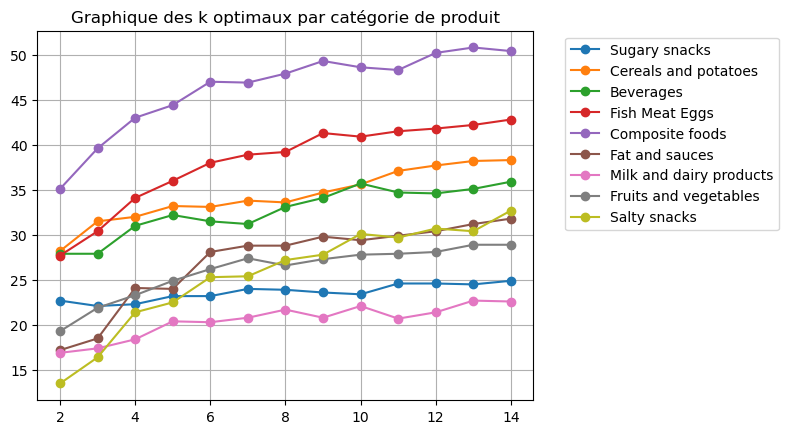

Tableau des k optimaux par catégorie de produit


,Catégorie,k optimal,Pourcentage d'erreur
0,Sugary snacks,3,22.1
1,Cereals and potatoes,2,28.2
2,Beverages,2,27.9
3,Fish Meat Eggs,2,27.7
4,Composite foods,2,35.1
5,Fat and sauces,2,17.2
6,Milk and dairy products,2,16.9
7,Fruits and vegetables,2,19.3
8,Salty snacks,2,13.5


In [57]:
#Suppression du warning dû à un changement de paramètre par défaut de "mode" utilisé dans l'algorithme des k-NN
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

list_categorie = df_clean['pnns_groups_1'].unique().tolist()
list_k_optimal = []
list_pourc_erreur = []


for categorie in list_categorie :
    #Réduction du dataframe
    df_clean_reduit = pd.DataFrame()
    df_clean_reduit = df_clean.loc[df_clean['pnns_groups_1'] == categorie, ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'nutrition_grade_fr' ]]
    df_clean_reduit_sans_na = pd.DataFrame()
    df_clean_reduit_sans_na = df_clean_reduit.dropna(axis = 0, how ='any', inplace = False)


    #Sampling
    sample = np.random.randint(df_clean_reduit_sans_na.shape[0], size=5000)
    data = df_clean_reduit_sans_na[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g']].iloc[sample]
    target = df_clean_reduit_sans_na.nutrition_grade_fr.iloc[sample]
    xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)
    
    #Trouvons le k optimal :
    errors = []
    for k in range(2,15):
        knn = neighbors.KNeighborsClassifier(k)
        errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
    
    plt.grid()
    plt.plot(range(2,15), errors, 'o-', label = categorie)
    plt.legend(bbox_to_anchor=(1.05, 1))

    #Sélection du k optimal : c'est l'abscisse minimum du graphique
    i = np.argmin(errors)
    list_x = []
    list_x = range(2,15)
    x_min = list_x[i]
    y_min = errors[i]
    list_k_optimal.append(x_min)
    list_pourc_erreur.append(y_min)

    
    #On utilise l'algorithme pour obtenir les données manquantes dans la colonne nutrition_grade_fr :
    #On sélectionne les lignes où nutrition_grade_fr est manquant et on stocke les données des autres colonnes dans x_nutri_na
    x_nutri_na = pd.DataFrame()
    x_nutri_na = df_clean_reduit.loc[df_clean_reduit['nutrition_grade_fr'].isnull() == True, ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g']]

    #On remet l'index à zéro :
    x_nutri_na.reset_index(drop = True, inplace = True)

    #On calcule les valeurs à prédire dans predicted :
    predicted = knn.predict(x_nutri_na)
    predicted = pd.Series(predicted)

    
    #On impute les valeurs prédites dans le dataframe df_clean de départ directement :
    df_clean.loc[(df_clean['nutrition_grade_fr'].isnull() == True) & (df_clean['pnns_groups_1'] == categorie), 'nutrition_grade_fr'] = predicted.values

    

plt.title("Graphique des k optimaux par catégorie de produit")
plt.show()



tableau = pd.DataFrame()
tableau['Catégorie'] = pd.Series(list_categorie)
tableau['k optimal'] = pd.Series(list_k_optimal)
tableau["Pourcentage d'erreur"] = pd.Series(list_pourc_erreur)
print("Tableau des k optimaux par catégorie de produit")
tableau



In [58]:
#Exemple de produit
df_clean.loc[df_clean.index == 6753]

,code,created_datetime,product_name,pnns_groups_1,quantity,brands,label_bio,stores,countries_fr,ingredients_text,allergens,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,additives_n,sugars_100g,salt_100g,ingredients_from_palm_oil_n,fiber_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr
6753,1.115270e+10,2015-02-25 09:12:31+00:00,Gyoza Wrappers (餃子皮),Composite foods,254 g,Imperial Dragon,Non bio,NaN,France,"Wheat Flour 69.5% (Flour, Niacin, Reduced Iron, Thiamine Mononitrate, Riboflavin and Folic Acid), Water, Cornstarch, Preservatives (E420, E280, E211, E282), Salt, Egg White, Egg Yolk.",NaN,657.0,6.8,1.9,13.9,7.2,5.0,2.0,0.938,0.0,1.7,NaN,a


# 5. Bilan des traitements

In [59]:
#Pourcentage de données non nulles par colonne :
nan_pourc_2 = round(100 - df_clean.isna().mean()*100, 2)
nan_pourc_2 = pd.DataFrame(nan_pourc_2, columns = ['Pourcentage de données non nulles'])
nan_pourc_2.index.name = 'Variables'
nan_pourc_2.reset_index(inplace = True)
nan_pourc_2

,Variables,Pourcentage de données non nulles
0,code,100.00
1,created_datetime,100.00
2,product_name,100.00
3,pnns_groups_1,100.00
4,quantity,86.23
5,brands,99.64
6,label_bio,100.00
7,stores,57.10
8,countries_fr,100.00
9,ingredients_text,80.60


## 5.1 Analyse ANOVA après imputations :

## 5.1.1 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et l'énergie (energy_100g)

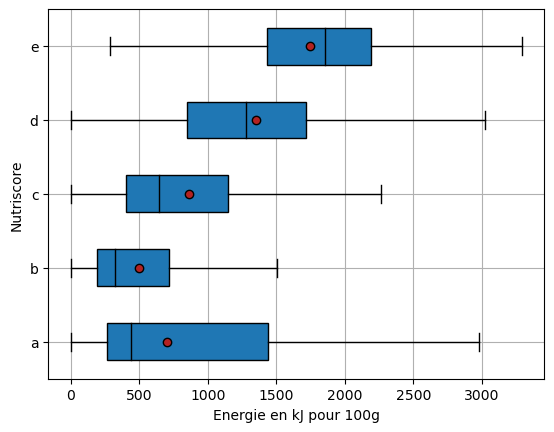

In [60]:
X = "nutrition_grade_fr" # qualitative
Y = "energy_100g" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) &(df_clean['energy_100g'].isnull() == False)].copy()



#Boxplots :
modalites = sous_echantillon[X].sort_values().unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Energie en kJ pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()





In [61]:
#Observation des produits avec nutriscore "a" et Energie supérieure à 2500kJ : 
sous_echantillon.loc[(sous_echantillon['nutrition_grade_fr'] == 'a') & (sous_echantillon['energy_100g'] > 2500)]

,code,created_datetime,product_name,pnns_groups_1,quantity,brands,label_bio,stores,countries_fr,ingredients_text,allergens,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,additives_n,sugars_100g,salt_100g,ingredients_from_palm_oil_n,fiber_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr
177017,2.000573e+07,2014-06-03 23:30:12+00:00,Walnuts,Salty snacks,200 g,"Alesto,Alesto Fine",Non bio,LIDL,France,_Noix_.,Noix,2979.0,69.1,6.80,3.7,15.5,0.0,3.0,0.020000,0.0,6.8,100.0,a
180238,2.050949e+07,2016-04-13 10:04:49+00:00,Mélange de Fruits Secs,Fruits and vegetables,100 g,Alesto Fine,Non bio,LIDL,France,"_noisettes_ grillées (50%), _amandes_ grillées (30%), _noix de cajou_ grillées (20%).","noisettes, amandes, noix de cajou",2679.0,56.0,5.30,15.0,19.0,0.0,4.2,0.030000,0.0,6.7,NaN,a
192056,3.068320e+12,2013-10-18 10:15:07+00:00,Evian,Beverages,50 cl,Evian,Bio,"Carrefour,Monoprix",France,EAU MINERALE NATUURLIJK MINER,NaN,2787.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.1,NaN,a
203671,3.245390e+12,2016-04-18 07:53:12+00:00,Amandes Décortiquées,Salty snacks,125 g e,Destination Saveurs,Non bio,NaN,France,_Amandes_ décortiquées.,Amandes,2607.0,53.0,4.00,3.7,25.0,0.0,3.4,0.020000,0.0,13.0,100.0,a
217993,3.266191e+12,2017-02-21 09:50:18+00:00,Baies de Goji Biologiques,Fruits and vegetables,250 g,La Vie Claire,Bio,NaN,France,NaN,NaN,2653.0,0.5,4.04,8.0,25.4,0.0,1.1,0.004000,0.0,12.6,NaN,a
218438,3.267110e+12,2017-04-20 11:47:04+00:00,Epicerie / Fruits Secs Et Purées / Purées De Fruits Secs,Fat and sauces,NaN,Perlamande,Bio,NaN,France,"N *Issues de l'agriculture de sésame - Sans lactosï73TÜfen. A conserver entre 15 et 250 , eta - INGREDIËNTEN: Hazetnoten*. *Van lactose, of 15 en devochtigheid en licht. Anbau EventuellSpu?n de préférence avant / Ten minste houdbaar tot / Mindesten5 haltbar bis - France. www.perlamande.com : qualitetìperlamande.com",NaN,2770.0,62.0,4.20,5.7,15.7,1.0,4.3,0.025000,0.0,9.3,NaN,a
220284,3.270720e+12,2015-02-28 15:04:27+00:00,Amandes décortiquées,Fruits and vegetables,125 g,"Couleurs Cuisine,Dacco Bello",Non bio,Leclerc,France,_Amandes_ décortiquées.,Amandes,2575.0,53.6,4.00,3.8,25.2,0.0,3.7,0.020000,0.0,12.2,NaN,a
220309,3.270720e+12,2013-08-27 12:43:56+00:00,Pistaches Grillées non salées Daco Bello,Salty snacks,500 g,Daco Bello,Non bio,Carrefour,France,pistaches.,NaN,2575.0,45.4,5.60,27.5,20.3,0.0,7.7,0.002499,0.0,10.3,NaN,a
220362,3.270728e+12,2016-05-16 09:42:45+00:00,Pignons de Pin,Fruits and vegetables,60 g,Daco Bello,Non bio,Carrefour,France,"Pignons de pin décortiqués, pelés et brossés (Grade A) . Espèce : Pinus koraiensis",NaN,2923.0,64.9,5.20,12.3,15.6,0.0,3.5,0.010000,0.0,5.7,NaN,a
232390,3.427290e+12,2013-10-08 18:24:58+00:00,Cerneaux de noix,Fruits and vegetables,125 g,Le temps des saisons,Non bio,NaN,France,Cerneaux de noix invalides,NaN,2858.0,0.5,5.50,8.0,15.3,0.0,6.0,0.010000,0.0,5.8,NaN,a


In [62]:
#Puis coefficient de corrélation qui sert l’analyse :

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_energie = eta_squared(sous_echantillon[X],sous_echantillon[Y])
print("Eta carré entre Nutriscore et Energie = ", eta_energie)




Eta carré entre Nutriscore et Energie =  0.320164771687739


## Donc il y a une légère corrélation entre nutrition_grade_fr et energy_100g

## 5.1.2 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et la teneur en protéines (proteins_100g) 

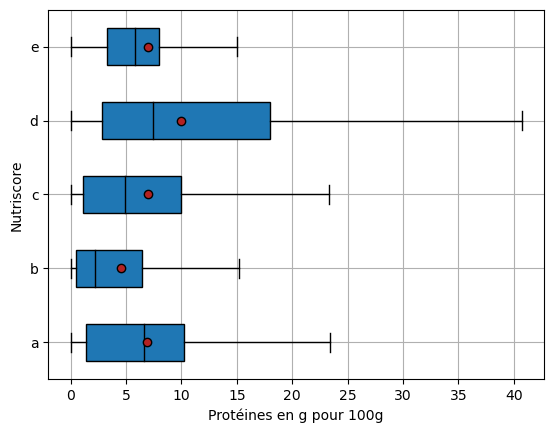

In [63]:
X1 = "nutrition_grade_fr" # qualitative
Y1 = "proteins_100g" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon1 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['proteins_100g'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon1[X1].sort_values().unique()
groupes = []
for m1 in modalites:
    groupes.append(sous_echantillon1[sous_echantillon1[X1]==m1][Y1])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Protéines en g pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()




In [64]:
#Puis coefficient de corrélation qui sert l’analyse :

eta_proteines = eta_squared(sous_echantillon1[X1],sous_echantillon1[Y1])
print("Eta carré entre Nutriscore et Protéines = ", eta_proteines)

Eta carré entre Nutriscore et Protéines =  0.05821995985041424


## Donc pas de corrélation entre nutriscore et protéines

## 5.1.3 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et la teneur en sel (salt_100g) 

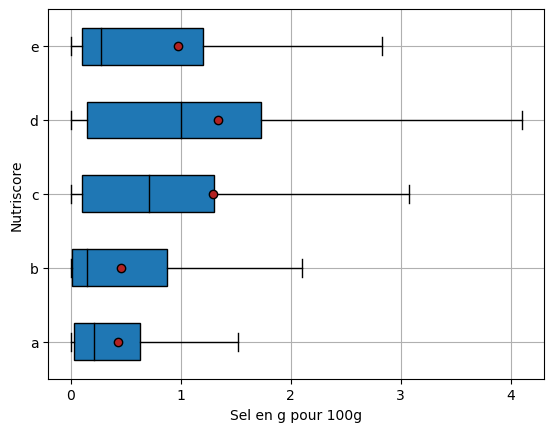

In [65]:
X2 = "nutrition_grade_fr" # qualitative
Y2 = "salt_100g" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon2 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['salt_100g'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon2[X2].sort_values().unique()
groupes = []
for m2 in modalites:
    groupes.append(sous_echantillon2[sous_echantillon2[X2]==m2][Y2])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Sel en g pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()

In [66]:
#Puis coefficient de corrélation qui sert l’analyse :

eta_sel = eta_squared(sous_echantillon2[X2],sous_echantillon2[Y2])
print("Eta carré entre Nutriscore et sel = ", eta_sel)

Eta carré entre Nutriscore et sel =  0.014182877608266697


## Donc pas de corrélation entre nutriscore et sel

## 5.1.4 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et la teneur en sucre (sugars_100g) 

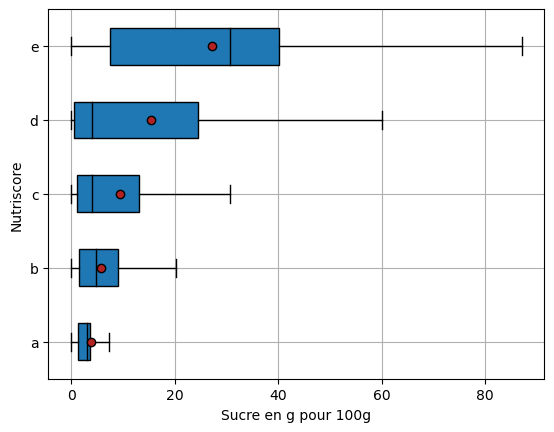

In [67]:
X3 = "nutrition_grade_fr" # qualitative
Y3 = "sugars_100g" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon3 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['sugars_100g'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon3[X3].sort_values().unique()
groupes = []
for m3 in modalites:
    groupes.append(sous_echantillon3[sous_echantillon3[X3]==m3][Y3])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Sucre en g pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()

In [68]:
#Puis coefficient de corrélation qui sert l’analyse :
eta_sucre = eta_squared(sous_echantillon3[X3],sous_echantillon3[Y3])
print("Eta carré entre Nutriscore et sucre = ", eta_sucre)

Eta carré entre Nutriscore et sucre =  0.20713351647268483


## Donc il y a une légère corrélation entre nutrition_grade_fr et sucre

## 5.1.5 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et la teneur en graisses (fat_100g) 

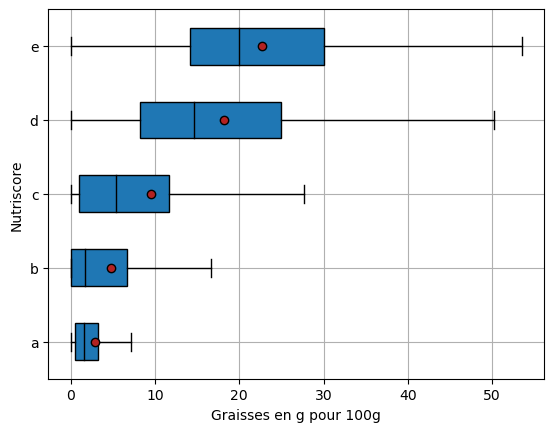

In [69]:
X4 = "nutrition_grade_fr" # qualitative
Y4 = "fat_100g" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon4 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['fat_100g'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon4[X4].sort_values().unique()
groupes = []
for m4 in modalites:
    groupes.append(sous_echantillon4[sous_echantillon4[X4]==m4][Y4])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Graisses en g pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()

In [70]:
#Puis coefficient de corrélation qui sert l’analyse :
eta_graisses = eta_squared(sous_echantillon4[X4],sous_echantillon4[Y4])    
print("Eta carré entre Nutriscore et Graisses = ", eta_graisses)

Eta carré entre Nutriscore et Graisses =  0.24139457571055462


## Donc il y a une légère corrélation entre nutrition_grade_fr et graisses

## 5.1.6 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et la teneur en graisses saturées (saturated-fat_100g) 

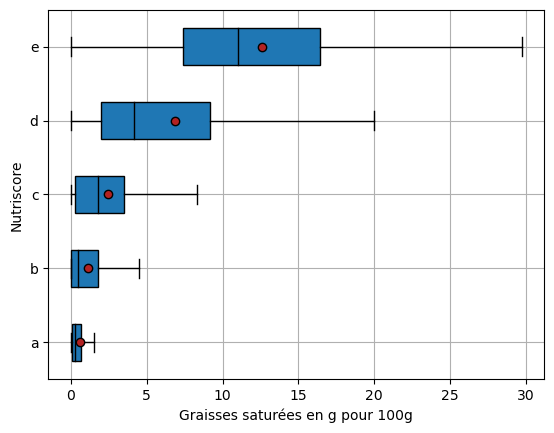

In [71]:
X5 = "nutrition_grade_fr" # qualitative
Y5 = "saturated-fat_100g" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon5 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['saturated-fat_100g'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon5[X5].sort_values().unique()
groupes = []
for m5 in modalites:
    groupes.append(sous_echantillon5[sous_echantillon5[X5]==m5][Y5])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Graisses saturées en g pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()

In [72]:
#Puis coefficient de corrélation qui sert l’analyse :
eta_graisses_saturees = eta_squared(sous_echantillon5[X5],sous_echantillon5[Y5])    
print("Eta carré entre Nutriscore et Graisses saturées = ", eta_graisses_saturees)

Eta carré entre Nutriscore et Graisses saturées =  0.30473581848558434


## Donc il y a une corrélation entre nutrition_grade_fr et graisses saturées

## 5.1.7 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et la teneur en glucides (carbohydrates_100g) 

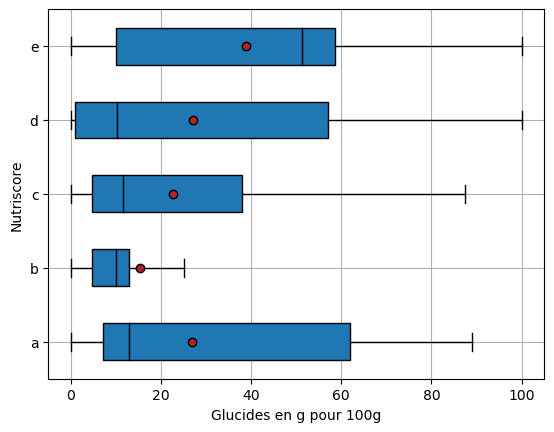

In [73]:
X6 = "nutrition_grade_fr" # qualitative
Y6 = "carbohydrates_100g" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon6 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['carbohydrates_100g'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon6[X6].sort_values().unique()
groupes = []
for m6 in modalites:
    groupes.append(sous_echantillon6[sous_echantillon6[X6]==m6][Y6])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Glucides en g pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()

In [74]:
#Puis coefficient de corrélation qui sert l’analyse :
eta_glucides = eta_squared(sous_echantillon6[X6],sous_echantillon6[Y6])    
print("Eta carré entre Nutriscore et Glucides = ", eta_glucides)

Eta carré entre Nutriscore et Glucides =  0.07485898669522852


## Donc pas de corrélation entre nutrition_grade_fr et glucides

## 5.1.8 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et la teneur en fibres (fiber_100g) 

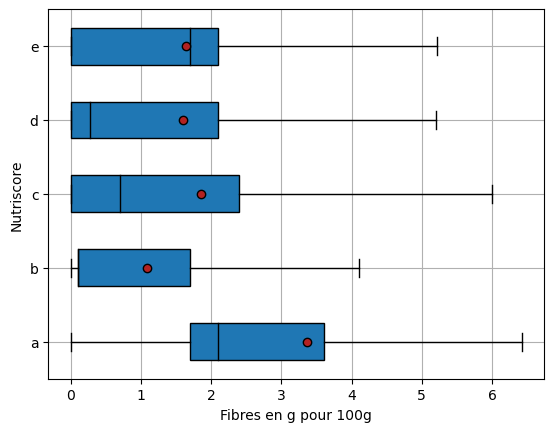

In [75]:
X7 = "nutrition_grade_fr" # qualitative
Y7 = "fiber_100g" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon7 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['fiber_100g'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon7[X7].sort_values().unique()
groupes = []
for m7 in modalites:
    groupes.append(sous_echantillon7[sous_echantillon7[X7]==m7][Y7])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Fibres en g pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()

In [76]:
#Puis coefficient de corrélation qui sert l’analyse :
eta_fibres = eta_squared(sous_echantillon7[X7],sous_echantillon7[Y7])    
print("Eta carré entre Nutriscore et Fibres = ", eta_fibres)

Eta carré entre Nutriscore et Fibres =  0.05069962902369765


## Donc pas de corrélation entre nutrition_grade_fr et glucides

## 5.1.9 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et la teneur en huile de palme (ingredients_from_palm_oil_n) 

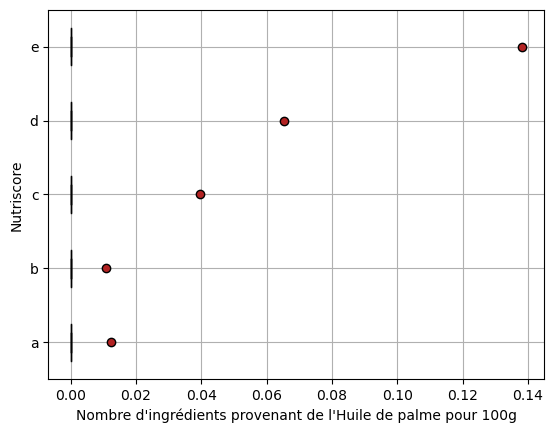

In [77]:
X8 = "nutrition_grade_fr" # qualitative
Y8 = "ingredients_from_palm_oil_n" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon8 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['ingredients_from_palm_oil_n'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon8[X8].sort_values().unique()
groupes = []
for m8 in modalites:
    groupes.append(sous_echantillon8[sous_echantillon8[X8]==m8][Y8])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Nombre d'ingrédients provenant de l'Huile de palme pour 100g")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()

In [78]:
#Puis coefficient de corrélation qui sert l’analyse :
eta_palm = eta_squared(sous_echantillon8[X8],sous_echantillon8[Y8])    
print("Eta carré entre Nutriscore et Huile de Palme = ", eta_palm)

Eta carré entre Nutriscore et Huile de Palme =  0.038332279075922314


## Donc pas de corrélation entre nutrition_grade_fr et Huile de palme

## 5.1.10 Analyse ANOVA de variables entre Nutriscore (nutrition_grade_fr) et additifs (additives_n)

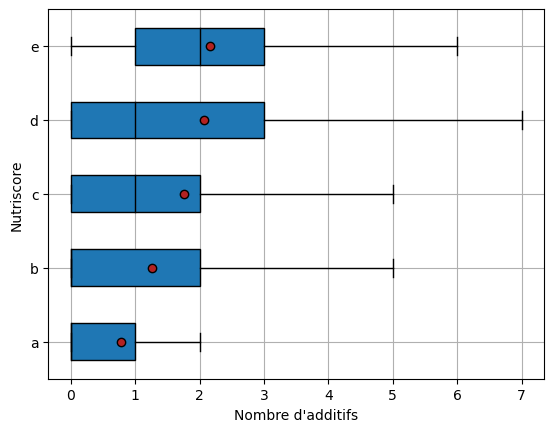

In [79]:
X9 = "nutrition_grade_fr" # qualitative
Y9 = "additives_n" # quantitative

# On réduit le dataframe aux valeurs dont nutrition_grade_fr est renseigné:
sous_echantillon9 = df_clean[(df_clean["nutrition_grade_fr"].isnull() == False) & ((df_clean['additives_n'].isnull() == False))].copy()



#Boxplots :
modalites = sous_echantillon9[X9].sort_values().unique()
groupes = []
for m9 in modalites:
    groupes.append(sous_echantillon9[sous_echantillon9[X9]==m9][Y9])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Nombre d'additifs")
plt.ylabel("Nutriscore")
plt.grid()
plt.show()

In [80]:
#Puis coefficient de corrélation qui sert l’analyse :
eta_add = eta_squared(sous_echantillon9[X9],sous_echantillon9[Y9])    
print("Eta carré entre Nutriscore et Huile de Palme = ", eta_add)

Eta carré entre Nutriscore et Huile de Palme =  0.046032941960276186


## Donc pas de corrélation entre Nutriscore et nombre d'additifs

## 5.1.11 Bilan des analyses ANOVA après imputations :

In [81]:
print("Tableau récapitulatif des coefficients de corrélation entre la variable nutrition_grade_fr et plusieurs autres variables :")

recapitulatif = pd.DataFrame()
recapitulatif['Variables'] = ['energy_100g', 'proteins_100g', 'salt_100g', 'sugars_100g', 'fat_100g', 'saturated-fat_100g', "carbohydrates_100g", "fiber_100g", "ingredients_from_palm_oil_n", "additives_n"]
recapitulatif['Nom des variables'] = ['Energie', 'Protéines', 'Sel', 'Sucre', 'Graisses', 'Graisses saturées', 'Glucides', 'Fibres', 'Huile de palme', "Nombre d'additifs"]
recapitulatif['Coefficient de corrélation avec le nutriscore, en %'] = [round(eta_energie,2)*100,round(eta_proteines,2)*100, round(eta_sel,2)*100, round(eta_sucre,2)*100, round(eta_graisses,2)*100, round(eta_graisses_saturees,2)*100, round(eta_glucides,2)*100, round(eta_fibres,2)*100, round(eta_palm, 2)*100,round(eta_add, 2)*100 ]
recapitulatif

Tableau récapitulatif des coefficients de corrélation entre la variable nutrition_grade_fr et plusieurs autres variables :


,Variables,Nom des variables,"Coefficient de corrélation avec le nutriscore, en %"
0,energy_100g,Energie,32.0
1,proteins_100g,Protéines,6.0
2,salt_100g,Sel,1.0
3,sugars_100g,Sucre,21.0
4,fat_100g,Graisses,24.0
5,saturated-fat_100g,Graisses saturées,30.0
6,carbohydrates_100g,Glucides,7.0
7,fiber_100g,Fibres,5.0
8,ingredients_from_palm_oil_n,Huile de palme,4.0
9,additives_n,Nombre d'additifs,5.0


## On observe donc toujours une certaine corrélation entre nutriscore et Energie, Sucre, Graisses et Graisses saturées, les pourcentages de corrélation ont très peu changé.

## 5.2 Observation du nutriscore

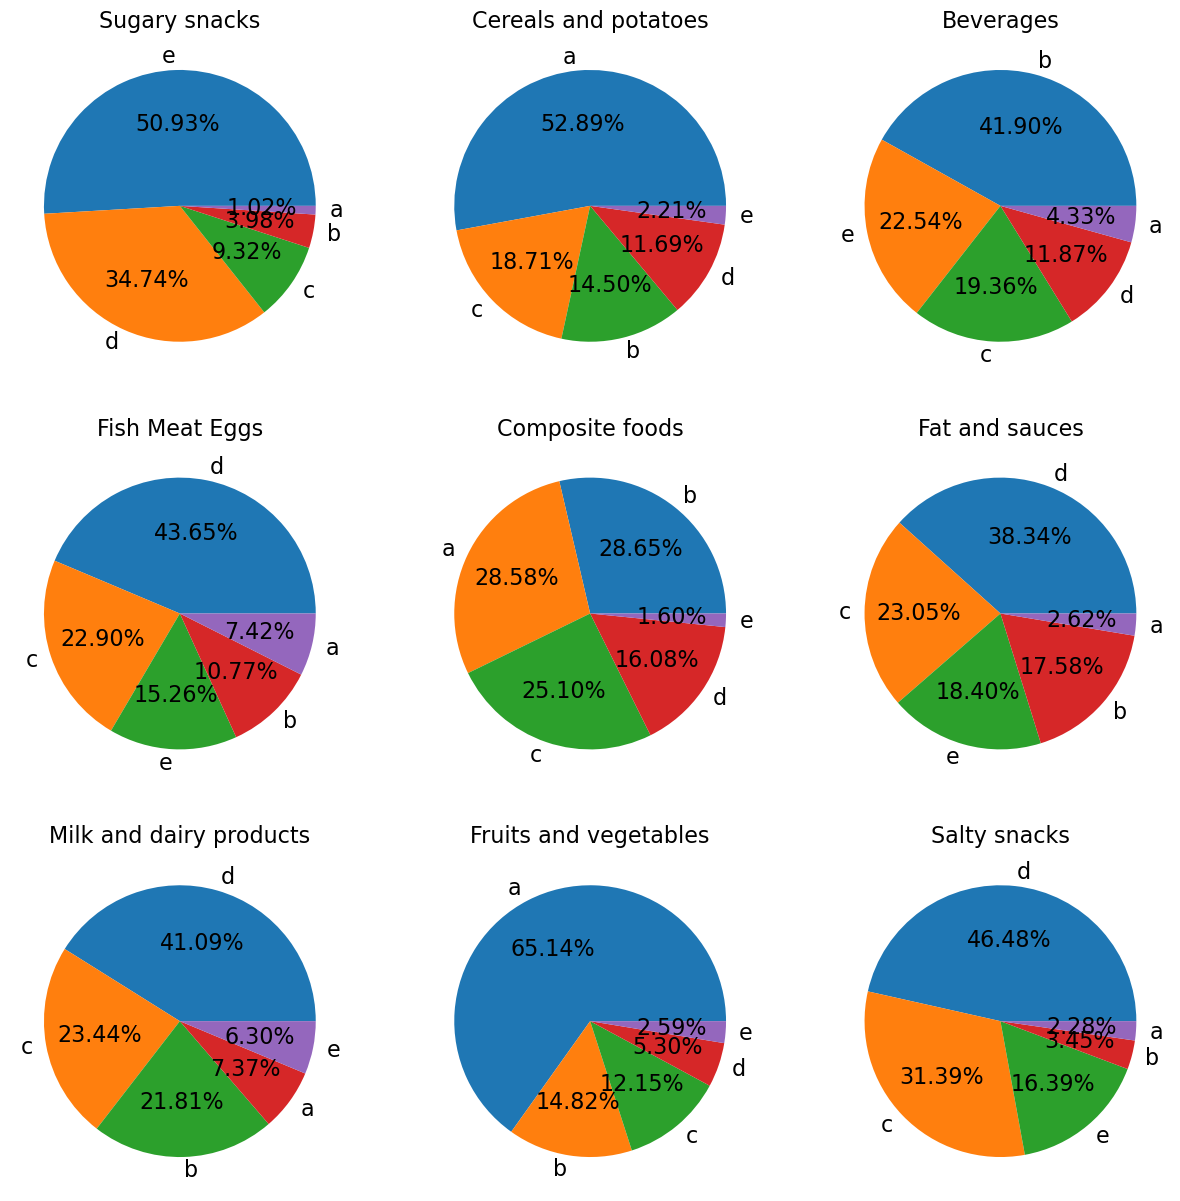

In [82]:
# Pourcentage de produits par catégorie et par niveau de nutriscore :


data = pd.DataFrame()
list_categorie = df_clean['pnns_groups_1'].unique().tolist()
i=0
plt.figure(figsize=(15, 15))
for categorie in list_categorie :
    
    data_categorie = df_clean.loc[df_clean['pnns_groups_1'] == categorie]
    data = data_categorie.nutrition_grade_fr.value_counts(normalize=True)
    data = pd.DataFrame(data)
    data = data.reset_index()
    i+=1
    plt.subplot(3,3,i)
    plt.pie(x=data['nutrition_grade_fr'], labels=data['index'], autopct='%.2f%%', textprops={'fontsize': 16})
    plt.title(categorie, fontsize = 16)

plt.show()


    
    
    

## Pour chaque catégorie de produit on peut observer quelles sont les proportions de chaque grade du nutriscore, exemple :
## Pour les fruits et légumes, il y a 65% de produits qui ont un nutriscore de a, pour les snacks salés, il y a une majorité de produits de catégorie c et d, voire e, et peu de a ou b.

## 5.3 Etude des corrélations entre variables (Matrice de corrélation des variables) après imputations :

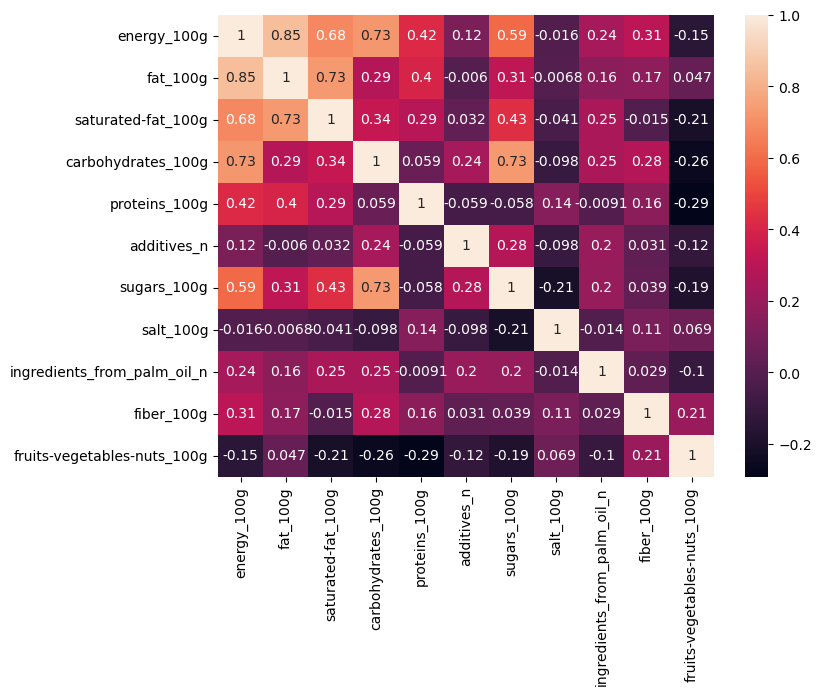

In [83]:
df_clean_sans_na = df_clean.dropna()
df_clean_sans_na = df_clean_sans_na.drop(['code'], axis = 1)
corr_df_clean = df_clean_sans_na.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df_clean, annot=True)
plt.show()

## On remarque toujours une corrélation entre energy_100g et fat_100g surtout, et aussi mais un peu plus avec carbohydrates_100g, et moins avec saturated-fat_100g et sugar_100g.

# 6. ACP

In [84]:
#On 'charge' seaborn : 
sns.set()


In [85]:
df_clean.head()

,code,created_datetime,product_name,pnns_groups_1,quantity,brands,label_bio,stores,countries_fr,ingredients_text,allergens,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,additives_n,sugars_100g,salt_100g,ingredients_from_palm_oil_n,fiber_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr
106,36252.0,2015-01-25 21:35:01+00:00,Lion Peanut x2,Sugary snacks,NaN,Sunridge,Non bio,NaN,"France,États-Unis","Milk chocolate coating (evaporated cane juice, cocoa butter, unsweetened chocolate, whole milk powder, soy lecithin, natural vanilla), dried cranberries (cranberries, sugar, sunflower oil), pure food glaze",NaN,1883.0,20.0,12.5,70.0,2.5,1.0,57.5,0.09652,0.0,2.5,NaN,e
182,5200016.0,2015-09-02 09:37:37+00:00,lentilles vertes,Cereals and potatoes,1 kg,Bertrand Lejeune,Bio,NaN,France,lentilles vertes,NaN,1492.0,3.0,0.6,64.0,9.1,0.0,3.2,0.40132,0.0,3.6,NaN,a
184,7730009.0,2016-05-09 15:07:12+00:00,Biscuits sablés fourrage au cacao,Sugary snacks,1 kg,St Michel,Non bio,NaN,France,"Sucre, farine de _Blé_, graisse et huiles végétales (karité, colza et tournesol), cacao maigre en poudre 7%, sirop de glucose, dextrine, _Beurre_ concentré, _Oeufs_, pâte de _Noisette_, pâte de cacao, émulsifiants : lécithines (colza et tournesol), sel, poudre à lever : carbonates d'ammonium, arômes.","Blé, Beurre, Oeufs, Noisette",1854.0,20.0,8.1,58.7,5.8,3.0,36.6,0.24000,0.0,2.1,NaN,e
188,10090206.0,2013-06-11 19:03:51+00:00,Thé de Noël aromatisé orange-cannelle,Beverages,75 g,Alice Délice,Non bio,Alice Délice,France,"Thé noir de Chine, zestes d'oranges 7,5 %, arômes naturels (cannelle 4,7 %, orange 4,7 %, poudre de cannelle 3,9 %).",NaN,192.0,0.0,0.0,10.0,0.5,0.0,9.0,0.01270,0.0,0.1,NaN,b
189,10127735.0,2016-05-07 10:25:04+00:00,Sirops pour ganache macarons,Sugary snacks,4 x 5 cl,Alice Délice,Non bio,Alice Délice,France,"Sirop saveur pistache 5 cl : sirop 99,16 % (sucre cristallisé, eau), arôme, acidifiant : acide citrique E330, denrée alimentaire colorante (concentrés de carthame, pomme), colorant : mélange d'additifs : E171, E211, E131. Sirop saveur framboise 5 cl : sirop 93,98 % (sucre, eau), denrée alimentaire colorante (concentrés de patate douce, cerise, pomme, radis, carthame), arôme naturel, acidifiant : acide citrique E330, colorant : mélange d'additifs : E171, E211. Sirop saveur citron 5 cl : sirop 98,86 % (sucre cristallisé, eau), arôme naturel, acidifiant : acide citrique E330, denrée alimentaire colorante (concentré de pomme, carthame), colorant : mélange d'additifs : E171, E211. Sirop saveur violette 4 cl : sirop 88,40 % (sucre, eau), arôme, acidifiant : acide citrique E330, denrée alimentaire colorante (concentré de cassis, carotte, pomme), colorant : mélange d'additifs : E131, E211, E171.",NaN,1854.0,20.0,8.1,58.7,5.8,4.0,36.6,0.24000,0.0,2.1,NaN,e


In [86]:
df_clean.shape #pour voir les dimensions

(60470, 23)

In [87]:
#sélection des colonnes :
df_entier = df_clean.copy()
cols = ["energy_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","proteins_100g","sugars_100g","salt_100g","ingredients_from_palm_oil_n", "fiber_100g"]
df_clean.index = df_clean['product_name']
df_clean = df_clean[cols] #sélection des colonnes
df_clean.head() #pour vérifier de DF



,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,sugars_100g,salt_100g,ingredients_from_palm_oil_n,fiber_100g
product_name,,,,,,,,,
Lion Peanut x2,1883.0,20.0,12.5,70.0,2.5,57.5,0.09652,0.0,2.5
lentilles vertes,1492.0,3.0,0.6,64.0,9.1,3.2,0.40132,0.0,3.6
Biscuits sablés fourrage au cacao,1854.0,20.0,8.1,58.7,5.8,36.6,0.24000,0.0,2.1
Thé de Noël aromatisé orange-cannelle,192.0,0.0,0.0,10.0,0.5,9.0,0.01270,0.0,0.1
Sirops pour ganache macarons,1854.0,20.0,8.1,58.7,5.8,36.6,0.24000,0.0,2.1


In [88]:
df_clean.shape #pour voir les nouvelles dimensions

(60470, 9)

In [89]:
#Séparation des données, X la matrice des données : 
X = df_clean.values
X[:5]
print(type(X)) #c’est bien un np.array
print(X.shape) #dimensions conformes


<class 'numpy.ndarray'>
(60470, 9)


In [90]:
produits = df_clean.index #on met la colonne des individus dans une variable
produits #affichage de produits

Index(['Lion Peanut x2', 'lentilles vertes ', 'Biscuits sablés fourrage au cacao', 'Thé de Noël aromatisé orange-cannelle', 'Sirops pour ganache macarons', 'Mini Confettis', 'Praliné Amande Et Noisette', 'Pepsi, Nouveau goût !', 'Tarte Poireaux Et Lardons', '7Up',
       ...
       'Peanut & Popcorn With Dark Chocolate 12 x 45G', 'Eat Natural Protein Packed', 'Fisherman's Friend Miel-Citron', 'Nature cheddar and red onion crisps', 'Verrine Cheescake Myrtille', 'Tartines craquantes bio au sarrasin', 'Amandes', 'Miel de Camargue', 'Thé vert Earl grey', 'Rillette d'oie'],
      dtype='object', name='product_name', length=60470)

In [91]:
features = df_clean.columns #on met les features (colonnes dépendantes) dans une variable nommée features
features #affichage de features

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'proteins_100g', 'sugars_100g', 'salt_100g', 'ingredients_from_palm_oil_n', 'fiber_100g'], dtype='object')

In [92]:
#PCA (ACP) :
scaler = StandardScaler() #on instancie
X_scaled = scaler.fit_transform(X)

In [93]:
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :] #on vérifie qu’on a une moyenne à 0 et écart-type à 1

,0,1,2,3,4,5,6,7,8
mean,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [94]:
n_components = 6 #on ne travaille que sur les 6 premières composantes
pca = PCA(n_components=n_components) #on instancie notre ACP
pca.fit(X_scaled) #on l’entraîne sur les données scalées

PCA(n_components=6)

In [95]:
pca.explained_variance_ratio_#cela donne le pourcentage de captation

scree = (pca.explained_variance_ratio_*100).round(2) #on met les informations dans scree
scree


array([29.9 , 19.43, 12.82, 10.85,  9.71,  7.79])

In [96]:
scree_cum = scree.cumsum().round() #on calcule la variance cumulée
scree_cum


array([30., 49., 62., 73., 83., 91.])

In [97]:
x_list = range(1, n_components+1) #variable avec la liste de nos composantes
list(x_list)


[1, 2, 3, 4, 5, 6]

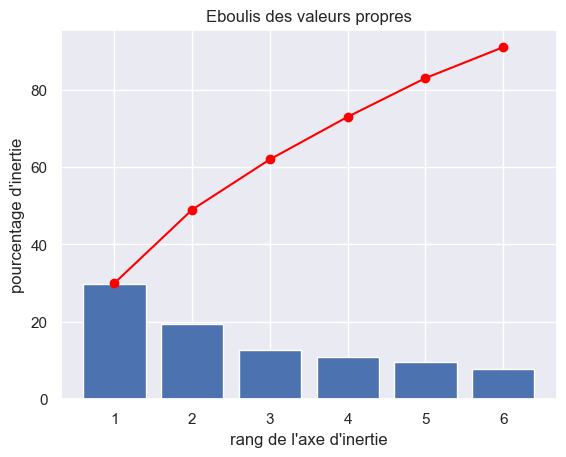

In [98]:
#Graphique :
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)


## On voit ici qu'on atteint 90% de la variance avec les 6 premières composantes et qu'on a plus de 60% avec les 3 premières

In [99]:
#Composantes :
pcs = pca.components_#calcul des composantes
pcs


array([[ 0.568562  ,  0.43732455,  0.4160365 ,  0.35093577,  0.09338094,
         0.30409811, -0.02308467,  0.2205998 ,  0.19710244],
       [-0.0807733 , -0.38465253, -0.34526269,  0.50308828, -0.38590757,
         0.48407916, -0.1974493 ,  0.13576253,  0.18038567],
       [ 0.0482637 , -0.21728546, -0.23507569,  0.18919567,  0.55644381,
        -0.18970932,  0.28624104, -0.07832421,  0.65246771],
       [-0.05069783, -0.05442211, -0.04613043,  0.03809218, -0.08943465,
         0.10720014,  0.83530503,  0.46189054, -0.24560363],
       [ 0.1003533 ,  0.06002642,  0.0451766 ,  0.12258978, -0.17010836,
         0.25758147,  0.4021022 , -0.84152778, -0.06416086],
       [-0.06777966,  0.19601425,  0.10714165, -0.21287126, -0.66379013,
        -0.27066789,  0.13711213,  0.05143383,  0.60404238]])

In [100]:
pcs = pd.DataFrame(pcs) #affichage version Pandas
pcs


,0,1,2,3,4,5,6,7,8
0,0.568562,0.437325,0.416037,0.350936,0.093381,0.304098,-0.023085,0.220600,0.197102
1,-0.080773,-0.384653,-0.345263,0.503088,-0.385908,0.484079,-0.197449,0.135763,0.180386
2,0.048264,-0.217285,-0.235076,0.189196,0.556444,-0.189709,0.286241,-0.078324,0.652468
3,-0.050698,-0.054422,-0.046130,0.038092,-0.089435,0.107200,0.835305,0.461891,-0.245604
4,0.100353,0.060026,0.045177,0.122590,-0.170108,0.257581,0.402102,-0.841528,-0.064161
5,-0.067780,0.196014,0.107142,-0.212871,-0.663790,-0.270668,0.137112,0.051434,0.604042


In [101]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2) #attention les résultats sont arrondis


,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,sugars_100g,salt_100g,ingredients_from_palm_oil_n,fiber_100g
F1,0.57,0.44,0.42,0.35,0.09,0.30,-0.02,0.22,0.20
F2,-0.08,-0.38,-0.35,0.50,-0.39,0.48,-0.20,0.14,0.18
F3,0.05,-0.22,-0.24,0.19,0.56,-0.19,0.29,-0.08,0.65
F4,-0.05,-0.05,-0.05,0.04,-0.09,0.11,0.84,0.46,-0.25
F5,0.10,0.06,0.05,0.12,-0.17,0.26,0.40,-0.84,-0.06
F6,-0.07,0.20,0.11,-0.21,-0.66,-0.27,0.14,0.05,0.60


## Interprétation :
F1 = 0,57 x energy_100g + 0,44 * fat_100g + ... + 0,18 * fiber_100g et 
F2 = 0,08 x energy_100g + 0,39 * fat_100g + ... + (-0,18 * fiber_100g)
...

<AxesSubplot:>

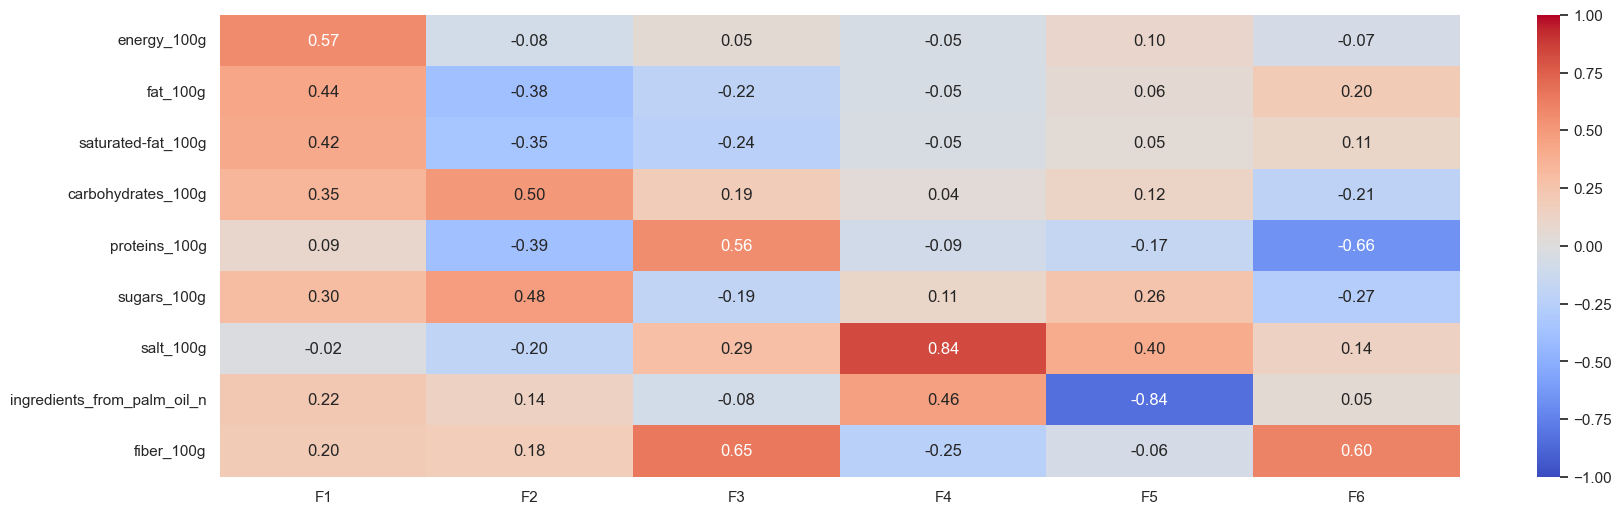

In [102]:
#Affichage du dataframe :
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")


In [103]:
#Cercle des corrélations :
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)



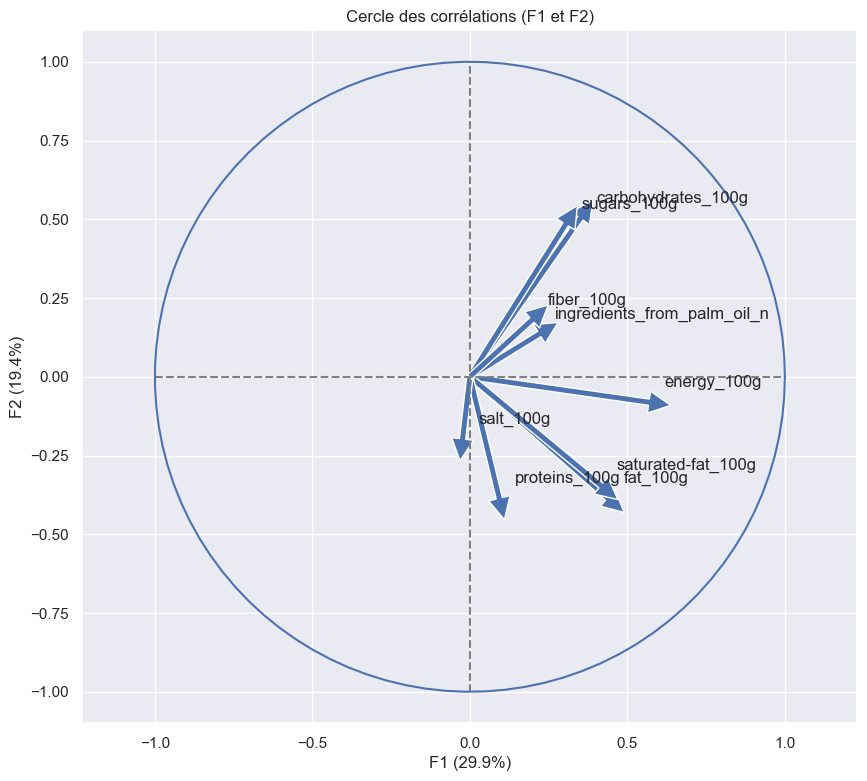

In [104]:
correlation_graph(pca, (0,1), features) #pour F1 et F2

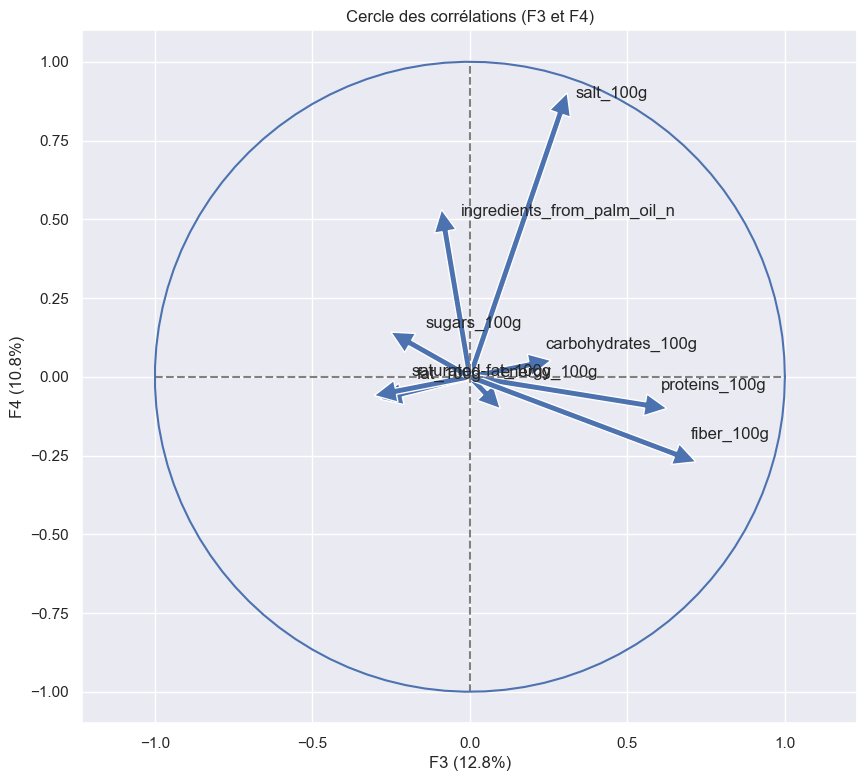

In [105]:
correlation_graph(pca, (2,3), features) #pour F3 et F4

In [106]:
#Projection de nos dimensions :

X_proj = pca.transform(X_scaled) # calcule les coordonnées de nos individus dans le nouvel espace 
X_proj = X_proj[:15] #on utilise un échantillon des 15 premiers produits qu'on affiche ensuite
X_proj

array([[ 2.49848228e+00,  1.73315795e+00, -7.43980588e-01,
        -1.02679661e-01,  1.22451456e+00, -4.06837541e-01],
       [ 2.42627915e-01,  8.33806534e-01,  1.09928835e+00,
        -3.67036968e-01,  9.24332589e-02, -2.50192677e-01],
       [ 1.75556811e+00,  9.46611643e-01, -2.93690742e-01,
        -1.90371958e-01,  7.91489586e-01, -4.16691413e-01],
       [-1.74283030e+00,  4.80621821e-01, -7.34035710e-01,
        -4.50766191e-02, -3.69152413e-02,  2.63311910e-01],
       [ 1.75556811e+00,  9.46611643e-01, -2.93690742e-01,
        -1.90371958e-01,  7.91489586e-01, -4.16691413e-01],
       [ 2.03403635e+00,  2.88171804e+00, -1.27124967e+00,
         2.60223926e-01,  1.58939141e+00, -1.05218487e+00],
       [ 2.27002299e+00,  1.41203647e+00,  3.61574523e-01,
        -3.51622747e-01,  8.82188318e-01, -7.50629629e-01],
       [-1.73683745e+00,  5.47325223e-01, -8.02976670e-01,
        -1.84562732e-02, -1.87752667e-03,  2.66662757e-01],
       [-4.96854307e-01, -6.46838516e-01, -7.564

In [107]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandés")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 
            


    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


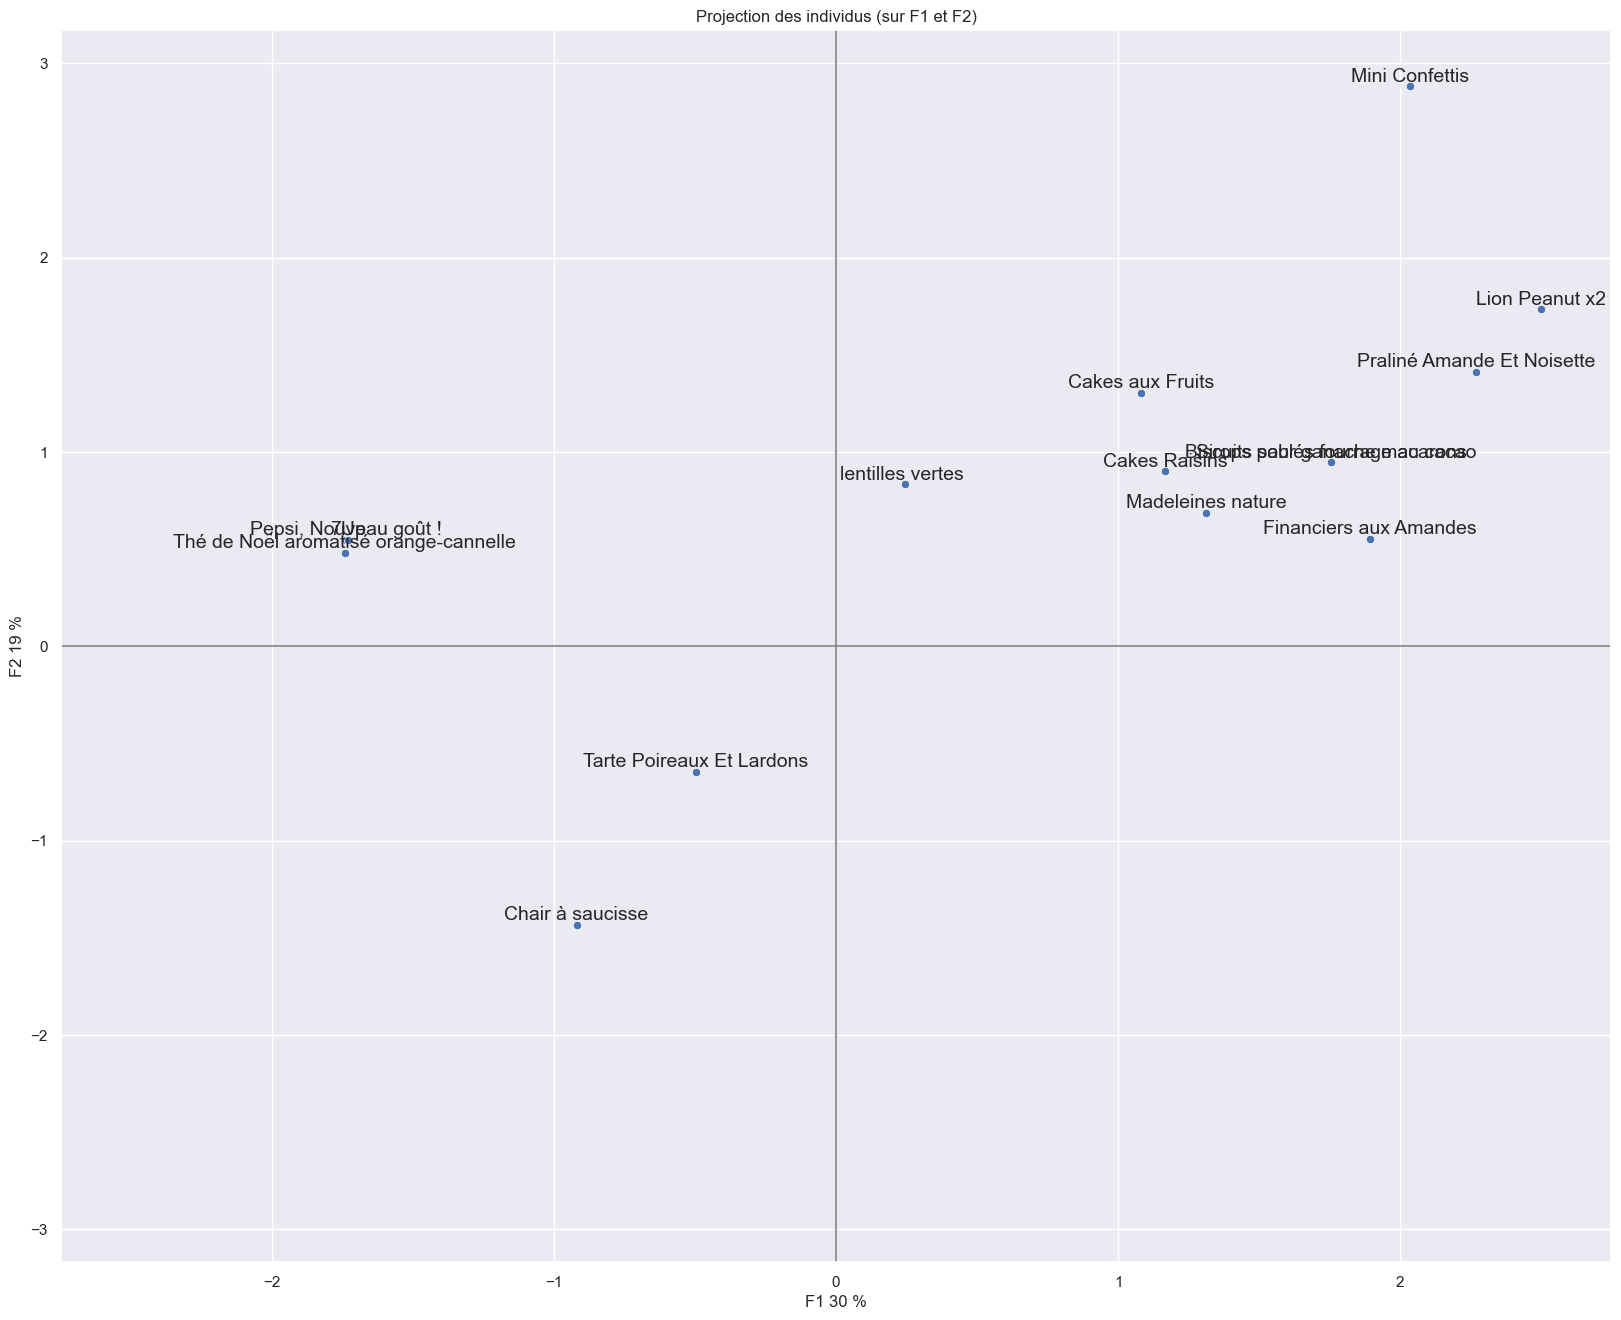

In [108]:

x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=produits, clusters=None, figsize=(20,16), marker="o")



# Interprétation :
## On observe d'après le cercle des corrélations que F1 est composé d'Energie, Graisses et Glucides (et sucre) en priorité, et F2 est composé surtout de la variable Glucides (et sucre)
## On voit, quand on projette les individus que le produit Mini confettis a une abscisse et une ordonnée assez élevées (c'est une sucrerie qui contient du sucre et des calories), de même que Lion Peanut et que la chair à saucisse aura moins de glucides que la tarte aux poireaux et lardons et sera moins calorique.
## On se servira de ce graphique pour trouver des produits proches d'un produit cherché dans l'application, selon certaines variables, donc selon certains axes du cercle de corrélation.
                                                                                    

# 7. Calcul du score sur 100 pour l'application :
## Plus les points sont élevés, et plus le produit est sain

In [109]:
#Retour au fichier complet :
df_entier.head(1)

,code,created_datetime,product_name,pnns_groups_1,quantity,brands,label_bio,stores,countries_fr,ingredients_text,allergens,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,additives_n,sugars_100g,salt_100g,ingredients_from_palm_oil_n,fiber_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr
106,36252.0,2015-01-25 21:35:01+00:00,Lion Peanut x2,Sugary snacks,NaN,Sunridge,Non bio,NaN,"France,États-Unis","Milk chocolate coating (evaporated cane juice, cocoa butter, unsweetened chocolate, whole milk powder, soy lecithin, natural vanilla), dried cranberries (cranberries, sugar, sunflower oil), pure food glaze",NaN,1883.0,20.0,12.5,70.0,2.5,1.0,57.5,0.09652,0.0,2.5,NaN,e


In [110]:
#Nombre d'individus et variables du fichier complet :
df_entier.shape

(60470, 23)

In [111]:
#Création d'un dataframe-tableau qui convertit les données des produits en points pour 
#le calcul du score (colonne supplémentaire) et qui ne conserve que les variables nécessaires
#à l'application :
score = pd.DataFrame()
score = df_entier[['code', 'created_datetime', 'product_name', 'pnns_groups_1','quantity', 'brands', 'label_bio', 'stores', 'countries_fr', 'ingredients_text', 'allergens', 'additives_n', 'salt_100g', 'ingredients_from_palm_oil_n', 'fiber_100g', 'fruits-vegetables-nuts_100g', 'nutrition_grade_fr']]
#Comme Nutriscore dépend de Energie, Sucre, Graisses et Graisses saturées et que Energie dépend de Graisses surtout, et aussi de Glucides, Graisses saturées et sucre, on ne met pas ces colonnes dans score

#Changement des colonnes en points :

score.loc[score['label_bio'] == 'Non bio', 'label_bio'] = 0
score.loc[score['label_bio'] != 'Non bio', 'label_bio'] = 10

score.loc[score['additives_n'] == 0, 'additives_n'] = 10
score.loc[(1 <= score['additives_n']) & (score['additives_n'] <= 3), 'additives_n'] = 0
score.loc[score['additives_n'] > 3, 'additives_n'] = -5


score.loc[(0 <= score['salt_100g']) & (score['salt_100g'] <= 0.3), 'salt_100g'] = 10
score.loc[(0.3 < score['salt_100g']) & (score['salt_100g'] <= 1.5), 'salt_100g'] = 5
score.loc[score['salt_100g'] > 1.5, 'salt_100g'] = -5


score.loc[score['ingredients_from_palm_oil_n'] == 0, 'ingredients_from_palm_oil_n'] = 5
score.loc[score['ingredients_from_palm_oil_n'] != 0, 'ingredients_from_palm_oil_n'] = -5


score.loc[score['fiber_100g'] >= 5, 'fiber_100g'] = 5
score.loc[score['fiber_100g'] < 5, 'fiber_100g'] = 0


score.loc[score['fruits-vegetables-nuts_100g'] <= 5, 'fruits-vegetables-nuts_100g'] = 0
score.loc[(5 < score['fruits-vegetables-nuts_100g']) & (score['fruits-vegetables-nuts_100g'] <= 20), 'fruits-vegetables-nuts_100g'] = 5
score.loc[(20 < score['fruits-vegetables-nuts_100g']) & (score['fruits-vegetables-nuts_100g'] <= 50), 'fruits-vegetables-nuts_100g'] = 7
score.loc[50 < score['fruits-vegetables-nuts_100g'], 'fruits-vegetables-nuts_100g'] = 10
score.loc[score['fruits-vegetables-nuts_100g'].isnull() == True, 'fruits-vegetables-nuts_100g'] = 0


score.loc[score['nutrition_grade_fr'] == 'a', 'nutrition_grade_fr'] = 50
score.loc[score['nutrition_grade_fr'] == 'b', 'nutrition_grade_fr'] = 40
score.loc[score['nutrition_grade_fr'] == 'c', 'nutrition_grade_fr'] = 30
score.loc[score['nutrition_grade_fr'] == 'd', 'nutrition_grade_fr'] = 20
score.loc[score['nutrition_grade_fr'] == 'e', 'nutrition_grade_fr'] = 10


#Calcul de la colonne score comme addition de certaines colonnes choisie et mise à 0 si le score est négatif :
score['score'] = score[['label_bio', 'additives_n', 'salt_100g', 'ingredients_from_palm_oil_n','fiber_100g', 'fruits-vegetables-nuts_100g', 'nutrition_grade_fr']].sum(axis=1)
score.loc[score['score']<0, 'score'] = 0

score.head(15)

/var/folders/11/rr01bdt55sb1r3f1t4_m_l2h0000gn/T/ipykernel_14382/848975884.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['score'] = score[['label_bio', 'additives_n', 'salt_100g', 'ingredients_from_palm_oil_n','fiber_100g', 'fruits-vegetables-nuts_100g', 'nutrition_grade_fr']].sum(axis=1)


,code,created_datetime,product_name,pnns_groups_1,quantity,brands,label_bio,stores,countries_fr,ingredients_text,allergens,additives_n,salt_100g,ingredients_from_palm_oil_n,fiber_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr,score
106,36252.0,2015-01-25 21:35:01+00:00,Lion Peanut x2,Sugary snacks,NaN,Sunridge,10,NaN,"France,États-Unis","Milk chocolate coating (evaporated cane juice, cocoa butter, unsweetened chocolate, whole milk powder, soy lecithin, natural vanilla), dried cranberries (cranberries, sugar, sunflower oil), pure food glaze",NaN,0.0,-5.0,-5.0,0.0,0.0,10,10.0
182,5200016.0,2015-09-02 09:37:37+00:00,lentilles vertes,Cereals and potatoes,1 kg,Bertrand Lejeune,10,NaN,France,lentilles vertes,NaN,-5.0,-5.0,-5.0,0.0,0.0,50,45.0
184,7730009.0,2016-05-09 15:07:12+00:00,Biscuits sablés fourrage au cacao,Sugary snacks,1 kg,St Michel,10,NaN,France,"Sucre, farine de _Blé_, graisse et huiles végétales (karité, colza et tournesol), cacao maigre en poudre 7%, sirop de glucose, dextrine, _Beurre_ concentré, _Oeufs_, pâte de _Noisette_, pâte de cacao, émulsifiants : lécithines (colza et tournesol), sel, poudre à lever : carbonates d'ammonium, arômes.","Blé, Beurre, Oeufs, Noisette",0.0,-5.0,-5.0,0.0,0.0,10,10.0
188,10090206.0,2013-06-11 19:03:51+00:00,Thé de Noël aromatisé orange-cannelle,Beverages,75 g,Alice Délice,10,Alice Délice,France,"Thé noir de Chine, zestes d'oranges 7,5 %, arômes naturels (cannelle 4,7 %, orange 4,7 %, poudre de cannelle 3,9 %).",NaN,-5.0,-5.0,-5.0,0.0,0.0,40,35.0
189,10127735.0,2016-05-07 10:25:04+00:00,Sirops pour ganache macarons,Sugary snacks,4 x 5 cl,Alice Délice,10,Alice Délice,France,"Sirop saveur pistache 5 cl : sirop 99,16 % (sucre cristallisé, eau), arôme, acidifiant : acide citrique E330, denrée alimentaire colorante (concentrés de carthame, pomme), colorant : mélange d'additifs : E171, E211, E131. Sirop saveur framboise 5 cl : sirop 93,98 % (sucre, eau), denrée alimentaire colorante (concentrés de patate douce, cerise, pomme, radis, carthame), arôme naturel, acidifiant : acide citrique E330, colorant : mélange d'additifs : E171, E211. Sirop saveur citron 5 cl : sirop 98,86 % (sucre cristallisé, eau), arôme naturel, acidifiant : acide citrique E330, denrée alimentaire colorante (concentré de pomme, carthame), colorant : mélange d'additifs : E171, E211. Sirop saveur violette 4 cl : sirop 88,40 % (sucre, eau), arôme, acidifiant : acide citrique E330, denrée alimentaire colorante (concentré de cassis, carotte, pomme), colorant : mélange d'additifs : E131, E211, E171.",NaN,-5.0,-5.0,-5.0,0.0,0.0,10,5.0
190,10187319.0,2017-02-17 10:05:54+00:00,Mini Confettis,Sugary snacks,NaN,Alice Délice,10,NaN,France,NaN,NaN,0.0,-5.0,-5.0,0.0,0.0,20,20.0
191,10207260.0,2017-03-22 17:17:11+00:00,Praliné Amande Et Noisette,Sugary snacks,NaN,Alice Délice,10,NaN,France,NaN,NaN,0.0,-5.0,-5.0,0.0,0.0,20,20.0
226,40608754.0,2012-08-15 09:48:28+00:00,"Pepsi, Nouveau goût !",Beverages,15 cl,Pepsi,10,NaN,France,"Eau gazéifiée, sucre, colorant caramel E150d, acidifiant : acide phosphorique, arômes (dont : extraits naturels de végétaux, caféine)",NaN,0.0,-5.0,-5.0,0.0,0.0,10,10.0
234,69161025.0,2017-03-22 19:59:36+00:00,Tarte Poireaux Et Lardons,Beverages,NaN,Bo Frost,10,NaN,France,NaN,NaN,-5.0,-5.0,-5.0,0.0,0.0,20,15.0
240,87177756.0,2015-06-06 10:28:06+00:00,7Up,Beverages,33 cl,"7Up,Pepsico",10,Cora Cafétéria,France,"Eau gazéifiée, sucre, acidifiants (acide citrique, acide malique), arômes (extraits naturels de citron et de citron vert), correcteur d'acidité (citrate de sodium)",NaN,0.0,-5.0,-5.0,0.0,0.0,10,10.0


# Exemples de produits avec leur score :
## - Lion Peanut x2 : 10/100
## - lentilles vertes : 45/100
## - Chair à saucisse : 15/100


# Ensuite, l'application pourra trouver un produit de la même catégorie avec un meilleur score grâce au graphique des projetés des individus